# [CONFIG] Configuração básica

## Básicos (numpy, pandas, math, display, locale, time, random, json, regex)

In [1]:
# !python -m pip install pandas
# !python -m pip install openpyxl
# !python -m pip install xlrd
# !python -m pip install jupyter
# !python -m pip install numpy
# # !python -m pip install random
# !python -m pip install IPython
# !python -m pip install json
# # !sudo dpkg-reconfigure locales
# !python -m pip install regex


from IPython.display import display
import json
import pandas as pd
import math
import numpy as np
import locale
# locale.setlocale(locale.LC_ALL, "pt_BR.UTF-8")  # Use "" for auto, or force e.g. to "en_US.UTF-8"

import time
from datetime import datetime, timedelta, date
import random

import regex as re

## Visualização (matplotlib, seaborn)

In [2]:
# !python -m pip install matplotlib
# !python -m pip install seaborn

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
# import seaborn as sns

## Web (BeautifulSoup, requests)

In [3]:
# !python -m pip install BeautifulSoup
from bs4 import BeautifulSoup

In [4]:
# !python -m pip install requests
import requests

## Drive (para ler e escrever arquivos)

In [5]:
from google.colab import drive
from google.colab import auth
import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)
drive.mount('/content/drive')

Mounted at /content/drive


## Previsão de resultados (sklearn)

In [6]:
# !python -m pip install sklearn

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics

random_state_seed = 12345
np.random.seed(random_state_seed)

# import random
random.seed(random_state_seed)

# Funções

## Elimina colunas NA

In [7]:
def elimina_colunas_NA(
    base,
    imprime_colunas_vazias = False,
    imprime_colunas_completas = False,
    imprime_colunas_parciais = False,
    remove_da_base = True,
    retorna_parciais = False
    ):

    tamanho_da_base = len(base)

    colunas_vazias = []
    colunas_completas = []
    colunas_parciais = []

    for coluna in base.columns:
        tamanho_da_coluna = len(base[base[coluna].isna()])
        if tamanho_da_coluna == tamanho_da_base:
            # print(coluna)
            colunas_vazias.append(coluna)
        elif tamanho_da_coluna == 0:
            colunas_completas.append(coluna)
        else:
            colunas_parciais.append(coluna)

    if imprime_colunas_vazias == True:
        if len(colunas_vazias) == 0:
            print("Não há colunas NA")
        else:
            print("Colunas vazias: " + str(colunas_vazias))

    if imprime_colunas_completas == True:
        if len(colunas_completas) == 0:
            print("Não há colunas completas")
        else:
            print("Colunas completas: " + str(colunas_completas))

    if imprime_colunas_parciais == True:
        if len(colunas_parciais) == 0:
            print("Não há colunas parciais")
        else:
            print("Colunas parciais: " + str(colunas_parciais))

    if remove_da_base == True:
        base = base.drop(colunas_vazias, axis = 1)

    if retorna_parciais == True:
        return [base, colunas_parciais]
    else:
        return base

## Agrupar cada coluna

In [8]:
def agrupamento_cada_coluna(
    bd,
    coluna_completa,
    colunas_ignoradas = [],
    ascending = False,
    imprime_tabelas = True,
    ):

    from IPython.display import display

    campos_com_erro = []
    dict_campos = {}

    colunas = bd.columns.drop(coluna_completa)

    if len(colunas_ignoradas) > 0:
        colunas = colunas.drop(colunas_ignoradas)

    for coluna in colunas:
        try:
            temp_coluna = bd.fillna("(vazio)").groupby(coluna).count()[[coluna_completa]].rename(columns = {coluna_completa: "Quantidade"}).sort_values("Quantidade", ascending = ascending)

            if ascending == False:
                temp_coluna["%"] = temp_coluna["Quantidade"]/temp_coluna["Quantidade"].sum()
                temp_coluna["% acumulado"] = temp_coluna["%"].cumsum()

            if imprime_tabelas == True:
                display(temp_coluna)

            dict_campos[coluna] = temp_coluna
            limpa(temp_coluna)

        except:
            campos_com_erro.append(coluna)
            #print("Campo " + coluna + " deu erro =/")

    return [campos_com_erro, dict_campos]

## Análise exploratória básica

In [9]:
def analise_exploratoria(
    bd,
    imprime_todas_colunas = False,
    imprime_info_colunas = True,
    imprime_colunas_vazias = False,
    imprime_colunas_completas = False,
    imprime_colunas_parciais = False,
    remove_da_base = True,
    retorna_parciais = False,
    detalhar_colunas_parciais = True,
    colunas_ignoradas = []
    ):

    # COMEÇANDO PELAS COLUNAS DISPONÍVEIS E INFO
    if imprime_todas_colunas == True:
        display(bd.columns)

    if imprime_info_colunas == True:
        for i in range(int(np.ceil(len(bd.columns)/20))):
            display(bd.iloc[:, (i*20):min((i+1)*20, len(bd.columns))].info())

    # DETALHAMENTO DE QUAIS COLUNAS SÃO NA OU PARCIAIS
    if retorna_parciais == True:
        [bd_semNA, colunas_parciais] = elimina_colunas_NA(
            bd,
            imprime_colunas_vazias = imprime_colunas_vazias,
            imprime_colunas_completas = imprime_colunas_completas,
            imprime_colunas_parciais = imprime_colunas_parciais,
            remove_da_base = remove_da_base,
            retorna_parciais = retorna_parciais
        )

        if detalhar_colunas_parciais == True:
            for coluna in colunas_parciais:
                print("# " + coluna + ": " + str(len(colunas_parciais[colunas_parciais[coluna].isna()])))
    else:
        colunas_parciais = []

        bd_semNA = elimina_colunas_NA(
            bd,
            imprime_colunas_vazias = imprime_colunas_vazias,
            imprime_colunas_completas = imprime_colunas_completas,
            imprime_colunas_parciais = imprime_colunas_parciais,
            remove_da_base = remove_da_base,
            retorna_parciais = retorna_parciais
        )

    [campos_com_erro, colunas_agrupadas] = agrupamento_cada_coluna(
        bd.reset_index(),
        coluna_completa = bd_semNA.drop(colunas_parciais, axis = 1).reset_index().columns[0],
        colunas_ignoradas = colunas_ignoradas
    )

    if retorna_parciais == True:
        return [bd_semNA, colunas_parciais, colunas_agrupadas, campos_com_erro]
    else:
        return [bd_semNA, colunas_agrupadas, campos_com_erro]

## Completa dígitos (padronizar chaves, CPF, etc)

In [10]:
def completa_digitos(texto, qtd):
    quantidade_zeros = qtd - len(texto)

    contador = quantidade_zeros
    while contador > 0:
        texto = "0" + texto
        contador = contador - 1

    # print(len(texto))

    return texto

## Exemplo de uso
# df["coluna_nova"] = df.apply(lambda x: completa_digitos(x["coluna_referencia"], 2), axis = 1)

## Histograma padrão

In [11]:
def histograma_padrao(
  dados_x,
  titulo = np.nan,
  dados_indice = np.nan,
  tipo = "hist",
  grid = False,
  legend = True,
  linha_media = np.nan,
  qtd_bins = 10,
  espessura = 0.8,
  limite_x_min = np.nan, limite_x_max = np.nan,
  limite_y_min = np.nan, limite_y_max = np.nan,
  ):

  plt.figure(figsize = (20,8))

  if not(pd.isnull(titulo)):
      plt.title(titulo, fontsize = 16)

  if tipo == "hist":
      n, bins, edges = plt.hist(
          dados_x,
          bins = qtd_bins,
          rwidth = espessura
          )
      plt.xticks(bins)

  elif tipo == "bar":
      plt.bar(
          dados_indice,
          dados_x,
          width = espessura
          )



  if not(math.isnan(linha_media)):
      plt.axvline(x=linha_media, color = "black", label='Média')

  if legend == True:
      plt.legend()

  plt.grid(grid)

  if (not(math.isnan(limite_x_max))) & (not(math.isnan(limite_x_min))):
      # print(limite_x_min)
      # print(~math.isnan(limite_x_max))
      plt.xlim(limite_x_min, limite_x_max)

  if (not(math.isnan(limite_y_max))) & (not(math.isnan(limite_y_min))):
      plt.ylim(limite_y_min, limite_y_max)

  plt.show()

## Gráfico com rótulos

In [12]:
def grafico_com_rotulos(
    dados, coluna_x, coluna_y,
    tipo_grafico = "bar", titulo_grafico = "", tamanho_grafico = (20, 8),
    fig = None, ax = None,
    tamanho_fonte = 12, grossura_barra = 1,
    cor_x = "b", rotacao_x = 0,
    formato_eixo_x = "{x:.2f}", formatador_eixo_x = matplotlib.ticker.StrMethodFormatter, locator_eixo_x = matplotlib.ticker.AutoLocator(),
    formato_eixo_y = "{x:.2f}",
    formato_y = "{:.2f}", rotacao_y = 0, limite_min_y = None, limite_max_y = None,
    xytext_label_y = (0,10),
  ):
  import matplotlib
  import matplotlib.pyplot as plt
  import matplotlib.dates as mdates
  # import matplotlib.ticker as ticker

  # dados_plot = dados_cliente[dados_cliente["% Faturamento Acumulado"] < 0.40]

  if fig is None:
    fig = plt.figure(figsize = tamanho_grafico)

  plt.clf()
  plt.rcParams.update({'font.size': tamanho_fonte})


  ys = dados[coluna_y]
  # xs = np.arange(len(dados[coluna_x]))
  xs = dados[coluna_x]

  if (tipo_grafico == "bar") | (tipo_grafico == "line"):
    if (tipo_grafico == "bar"):
      plt.bar(
          x = xs,
          height = ys,
          width = grossura_barra,
          label = coluna_y,
      )
    elif (tipo_grafico == "line"):
      plt.plot(
        xs,
        ys,
        cor_x + "o-",
        label = coluna_y,
      )

    # display(cor_x + "o-")

    ax1 = plt.gca()
    if (limite_min_y is not None):
      if (limite_max_y is not None):
        ax1.set_ylim([min(dados[coluna_y])*limite_min_y, max(dados[coluna_y])*limite_max_y])
      else:
        ax1.set_ylim([min(dados[coluna_y])*limite_min_y, None])
    elif (limite_min_y is None):
      if (limite_max_y is not None):
        ax1.set_ylim([None, max(dados[coluna_y])*limite_max_y])

    ax1.set_ylabel(coluna_y, color = cor_x)
    ax1.set_xlabel(coluna_x)

    for x,y in zip(xs,ys):
        label = formato_y.format(y)

        plt.annotate(label, # this is the text
                    (x,y), # these are the coordinates to position the label
                    textcoords="offset points", # how to position the text
                    xytext = xytext_label_y, # distance from text to points (x,y)
                    ha='center', # horizontal alignment can be left, right or center
                    color = cor_x,
                    rotation = rotacao_y)


        ax1.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter(formato_eixo_y))

    # fig.legend()
    ax1.xaxis.set_tick_params(rotation = rotacao_x)
    ax1.xaxis.set_major_locator(locator_eixo_x)
    ax1.xaxis.set_major_formatter(formatador_eixo_x(formato_eixo_x))
    # plt.xticks(xs, dados[coluna_x])

  elif tipo_grafico == "barh":
    plt.barh(
        y = xs,
        width = ys,
        height = grossura_barra,
        # label = coluna_y,
    )
    ax1 = plt.gca()
    ax1.set_yticks(xs, dados[coluna_x])

    ax1.set_ylabel(coluna_x)
    ax1.set_xlabel(coluna_y, color = cor_x)
    ax1.invert_yaxis()

    if (limite_min_y is not None) & (limite_max_y is not None):
      ax1.set_xlim([min(dados[coluna_y])*limite_min_y, max(dados[coluna_y])*limite_max_y])

    for x,y in zip(xs,ys):
      label = formato_y.format(y)

      plt.annotate(label, # this is the text
                (y, x), # these are the coordinates to position the label
                textcoords="offset points", # how to position the text
                xytext = (xytext_label_y[1], xytext_label_y[0]), # distance from text to points (x,y)
                ha='center', # horizontal alignment can be left, right or center
                color = cor_x,
                rotation = rotacao_y)

    ax1.xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter(formato_eixo_y))

  plt.title(titulo_grafico)
  plt.show()

## GridSearch

In [13]:
def treina_modelo_grid(
  x_train,
  y_train,
  modelo,
  param_grid,
  cv = 10,
  scoring = "neg_mean_absolute_error",
  tipo = "grid",
  random_state_seed = 1082141,
  n_iter = 50
):
  from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

  if tipo == "grid":
      grid = GridSearchCV(
          modelo,
          param_grid,
          cv = cv,
          scoring = scoring,
          return_train_score = True,
      )

  elif tipo == "randomized":
      # print("Busca randomizada em " + str(n_iter) + " combinações de parâmetros.")
      grid = RandomizedSearchCV(
          modelo,
          param_grid,
          cv = cv,
          scoring = scoring,
          return_train_score = True,
          random_state = random_state_seed,
          n_iter = n_iter,
      )

  grid.fit(x_train, y_train)

  return grid

### Definimos range de hiperparâmetros
# n_neighbors_range = range(10, 20)
# metric_range = ["cityblock", "cosine", "euclidean", "haversine", "l1", "l2", "manhattan", "nan_euclidean", "minkowski"]
# algorithm_range = ["auto", "ball_tree", "kd_tree", "brute"]

# param_grid = dict(algorithm = algorithm_range)
# # display(param_grid)

# grid_melhor_algorithm = treina_modelo_grid(
#     dados_treino_X,
#     dados_treino_y,
#     KNeighborsClassifier(n_neighbors = 12, metric = "euclidean"),
#     param_grid,
#     cv = 5,
#     scoring = "accuracy",
#     tipo = "grid",
#     random_state_seed = numero_aleatorio,
#     # n_iter = 50
# )

# # print(grid.best_score_)
# # grid.best_estimator_
# tabela_resultados = pd.concat([
#   pd.json_normalize(pd.DataFrame(grid_melhor_algorithm.cv_results_)["params"]),
#   pd.DataFrame(grid_melhor_algorithm.cv_results_)[["rank_test_score", "mean_test_score"]]
# ], axis = 1).set_index("rank_test_score").sort_index()


# plt.figure(figsize = (15,8))
# display(tabela_resultados)
# plt.bar(x = tabela_resultados["algorithm"], height = tabela_resultados["mean_test_score"]);

## Funções específicas

### Leitura Torneio com Rodadas, turno e returno

In [14]:
def leitura_dados_torneio_rodadas(
    url,
    qtd_rodadas,
    nome_torneio,
):
  # Initialize a list to store the extracted data
  lista_resultado = []

  for i in range(qtd_rodadas):
    # print(i+1)
    rodada = str(i+1)
    print("Leitura da Rodada: " + rodada)

    torneio_url = url + rodada
    torneio_response_rodada = requests.get(torneio_url)

    # Create a BeautifulSoup object with the HTML content
    torneio_soup_rodada = BeautifulSoup(torneio_response_rodada.content, 'html.parser')
    # torneio_soup_rodada

    # Se quiser exportar e ler os dados offline
    # with open(caminho_da_pasta + 'Torneio.html', "w") as file:
    #   file.write(str(torneio_soup_rodada))

    torneio_jogos_rodada = torneio_soup_rodada. \
      find_all('table', class_='competition-rounds competition-half-padding')[0]. \
      find_all("tr", class_= ["even", "odd"]) # find_all("tr", class_=lambda s: "even" in s or "odd" in s)

    for jogo in torneio_jogos_rodada:
      # O site tem uma tag a mais "Previsão" para jogos que não rolaram ainda
      posicao = 0
      if jogo.find_all("a")[0].text.strip() == "Previsão":
        posicao = 1

      try:
        data_jogo = jogo.find("td", class_="darker tipsy-active nowrap").get("title")
      except:
        data_jogo = jogo.find("td", class_="darker tipsy-active nowrap gameinlive").get("title")

      link_jogo = jogo.find_all("a")[3 + posicao].get("href")
      timeA_nome = jogo.find_all("a")[0 + posicao].text.strip()
      timeB_nome = jogo.find_all("a")[2 + posicao].text.strip()
      resultado = jogo.find_all("a")[1 + posicao].text.strip()
      if int(rodada) <= (qtd_rodadas/2):
        ida_ou_volta = "Ida"
      else:
        ida_ou_volta = "Volta"

      # Add the dictionary to the data list
      lista_resultado.append({
          'data_jogo': data_jogo,
          'link_jogo': link_jogo,
          'timeA_nome': timeA_nome,
          'timeB_nome': timeB_nome,
          'resultado': resultado,
          'fase': "Rodada " + rodada,
          'ida ou volta': ida_ou_volta,
          'torneio': nome_torneio,
      })

  # lista_resultado
  return lista_resultado

### Tabela de pontos Brasileirão

In [15]:
def cria_tabela_brasileirao(
    base,
):

  # Estatísticas como mandante
  tabela_brasileirao_mandante_temp = base.groupby(["Time mandante (nome)", "Resultado jogo"]).count()[["Link para o jogo"]]
  tabela_brasileirao_mandante_temp = tabela_brasileirao_mandante_temp.join(
          base[["Time mandante (nome)", "Resultado jogo", "Gols mandante", "Gols visitante"]]. \
          groupby(["Time mandante (nome)", "Resultado jogo"]).sum()[["Gols mandante", "Gols visitante"]]
      ).reset_index()
  tabela_brasileirao_mandante_temp.loc[tabela_brasileirao_mandante_temp["Resultado jogo"] == "Empate", "Pontos"] = \
      1 * tabela_brasileirao_mandante_temp.loc[tabela_brasileirao_mandante_temp["Resultado jogo"] == "Empate", "Link para o jogo"]
  tabela_brasileirao_mandante_temp.loc[tabela_brasileirao_mandante_temp["Resultado jogo"] == "Mandante", "Pontos"] = \
      3 * tabela_brasileirao_mandante_temp.loc[tabela_brasileirao_mandante_temp["Resultado jogo"] == "Mandante", "Link para o jogo"]
  tabela_brasileirao_mandante_temp.loc[tabela_brasileirao_mandante_temp["Resultado jogo"] == "Visitante", "Pontos"] = 0

  tabela_brasileirao_mandante_temp = tabela_brasileirao_mandante_temp.rename(
      {"Link para o jogo": "Qtd jogos (como mandante)",
      "Time mandante (nome)": "Time",
      "Pontos": "Pontos (como mandante)",
      "Gols mandante": "Gols pró (como mandante)",
      "Gols visitante": "Gols contra (como mandante)",}, axis = 1)

  tabela_brasileirao_mandante_temp = tabela_brasileirao_mandante_temp.set_index(["Time", "Resultado jogo"])
  # tabela_brasileirao_mandante_temp


  # Estatísticas como visitante
  tabela_brasileirao_visitante_temp = base.groupby(["Time visitante (nome)", "Resultado jogo"]).count()[["Link para o jogo"]]
  tabela_brasileirao_visitante_temp = tabela_brasileirao_visitante_temp.join(
          base[["Time visitante (nome)", "Resultado jogo", "Gols mandante", "Gols visitante"]]. \
          groupby(["Time visitante (nome)", "Resultado jogo"]).sum()[["Gols mandante", "Gols visitante"]]
      ).reset_index()
  tabela_brasileirao_visitante_temp.loc[tabela_brasileirao_visitante_temp["Resultado jogo"] == "Empate", "Pontos"] = \
      1 * tabela_brasileirao_visitante_temp.loc[tabela_brasileirao_visitante_temp["Resultado jogo"] == "Empate", "Link para o jogo"]
  tabela_brasileirao_visitante_temp.loc[tabela_brasileirao_visitante_temp["Resultado jogo"] == "Visitante", "Pontos"] = \
      3 * tabela_brasileirao_visitante_temp.loc[tabela_brasileirao_visitante_temp["Resultado jogo"] == "Visitante", "Link para o jogo"]
  tabela_brasileirao_visitante_temp.loc[tabela_brasileirao_visitante_temp["Resultado jogo"] == "Mandante", "Pontos"] = 0

  tabela_brasileirao_visitante_temp = tabela_brasileirao_visitante_temp.rename(
      {"Link para o jogo": "Qtd jogos (como visitante)",
      "Time visitante (nome)": "Time",
      "Pontos": "Pontos (como visitante)",
      "Gols visitante": "Gols pró (como visitante)",
      "Gols mandante": "Gols contra (como visitante)",}, axis = 1)

  tabela_brasileirao_visitante_temp = tabela_brasileirao_visitante_temp.set_index(["Time", "Resultado jogo"])
  # tabela_brasileirao_visitante_temp


  # Totais
  tabela_brasileirao_temp = tabela_brasileirao_visitante_temp.join(tabela_brasileirao_mandante_temp, how = "outer").fillna(0).reset_index()

  # Pontos totais
  tabela_brasileirao_temp["Pontos (total)"] = tabela_brasileirao_temp["Pontos (como visitante)"] + tabela_brasileirao_temp["Pontos (como mandante)"]

  # Jogos totais
  tabela_brasileirao_temp["Qtd jogos (total)"] = tabela_brasileirao_temp["Qtd jogos (como visitante)"] + tabela_brasileirao_temp["Qtd jogos (como mandante)"]

  # Empates como mandante, como visitante e totais
  tabela_brasileirao_temp["Qtd empates (como mandante)"] = \
      tabela_brasileirao_temp.loc[tabela_brasileirao_temp["Resultado jogo"] == "Empate", "Qtd jogos (como mandante)"]
  tabela_brasileirao_temp["Qtd empates (como visitante)"] = \
      tabela_brasileirao_temp.loc[tabela_brasileirao_temp["Resultado jogo"] == "Empate", "Qtd jogos (como visitante)"]
  tabela_brasileirao_temp = tabela_brasileirao_temp.fillna(0)
  tabela_brasileirao_temp["Qtd empates (total)"] = tabela_brasileirao_temp["Qtd empates (como mandante)"] + tabela_brasileirao_temp["Qtd empates (como visitante)"]


  # Derrotas totais
  tabela_brasileirao_temp["Qtd derrotas (como visitante)"] = \
      tabela_brasileirao_temp.loc[tabela_brasileirao_temp["Resultado jogo"] == "Mandante", "Qtd jogos (como visitante)"]
  tabela_brasileirao_temp["Qtd derrotas (como mandante)"] = \
      tabela_brasileirao_temp.loc[tabela_brasileirao_temp["Resultado jogo"] == "Visitante", "Qtd jogos (como mandante)"]
  tabela_brasileirao_temp = tabela_brasileirao_temp.fillna(0)
  tabela_brasileirao_temp["Qtd derrotas (total)"] = tabela_brasileirao_temp["Qtd derrotas (como mandante)"] + tabela_brasileirao_temp["Qtd derrotas (como visitante)"]

  # Vitórias totais
  tabela_brasileirao_temp.loc[tabela_brasileirao_temp["Resultado jogo"] == "Mandante", "Qtd vitórias (total)"] = tabela_brasileirao_temp["Qtd jogos (como mandante)"]
  tabela_brasileirao_temp.loc[tabela_brasileirao_temp["Resultado jogo"] == "Visitante", "Qtd vitórias (total)"] = tabela_brasileirao_temp["Qtd jogos (como visitante)"]
  tabela_brasileirao_temp = tabela_brasileirao_temp.fillna(0)

  # Gols totais
  tabela_brasileirao_temp["Gols pró"] = tabela_brasileirao_temp["Gols pró (como visitante)"] + tabela_brasileirao_temp["Gols pró (como mandante)"]
  tabela_brasileirao_temp["Gols contra"] = tabela_brasileirao_temp["Gols contra (como visitante)"] + tabela_brasileirao_temp["Gols contra (como mandante)"]

  # Tabela final
  tabela_brasileirao_final = tabela_brasileirao_temp.groupby("Time").sum(numeric_only = True) \
      [["Pontos (total)", "Qtd jogos (total)", "Qtd vitórias (total)", "Qtd empates (total)", "Qtd derrotas (total)", "Gols pró", "Gols contra"]]
  tabela_brasileirao_final["Saldo de gols"] = tabela_brasileirao_final["Gols pró"] - tabela_brasileirao_final["Gols contra"]
  tabela_brasileirao_final["% aproveitamento"] = tabela_brasileirao_final["Pontos (total)"]/(tabela_brasileirao_final["Qtd jogos (total)"]*3)
  tabela_brasileirao_final = tabela_brasileirao_final.sort_values(by = ["Pontos (total)", "Qtd vitórias (total)", "Saldo de gols", "Gols pró"], ascending = False)
  tabela_brasileirao_final = tabela_brasileirao_final.reset_index().reset_index()
  tabela_brasileirao_final["Posição"] = tabela_brasileirao_final["index"] + 1
  tabela_brasileirao_final = tabela_brasileirao_final.set_index("Posição").drop("index", axis = 1)

  return tabela_brasileirao_final

# Ler da pasta (caso já tenha sido lido dos sites antes)

## Variável global (reler dados)

In [16]:
# var_reler_dados = False
var_reler_dados = True

# var_reler_dados_tratados = False
var_reler_dados_tratados = True

var_reler_dados_detalhados = False
# var_reler_dados_detalhados = True

## Variável global (caminho da pasta)

In [17]:
caminho_da_pasta = '/content/drive/My Drive/Estudo/Data Science/Análise Campeonato Brasileiro/'

## Leitura da pasta

In [18]:
if var_reler_dados == False:
  base_jogos_academia_apostas = pd.read_excel(
      caminho_da_pasta + 'Brutos/Base Jogos.xlsx',
      # encoding = 'ISO-8859-1',
      # low_memory=False,
      index_col = 0
    )
  display(base_jogos_academia_apostas)

if var_reler_dados_tratados == False:
  base_jogos_tratada_duplicada = pd.read_excel(
      caminho_da_pasta + 'Tratados/Base Jogos Tratada Duplicada.xlsx',
      # encoding = 'ISO-8859-1',
      # low_memory=False,
      index_col = 0
    )
  display(base_jogos_tratada_duplicada)

# Leitura (site Academia Apostas Brasil)

## Brasileirão Série A

In [19]:
if var_reler_dados == True:
  brasileiraoA_resultado = leitura_dados_torneio_rodadas(
    url = 'https://www.academiadasapostasbrasil.com/stats/competition/brasil/26/NR2zmkLnBQ08o/og0WZv4p7QLJv/0/',
    qtd_rodadas = 38,
    nome_torneio = "Brasileirão Série A",
  )

  # Convert the data to a pandas DataFrame
  brasileiraoA_base_resultado = pd.DataFrame(brasileiraoA_resultado)

  display(brasileiraoA_base_resultado.head())
  display(brasileiraoA_base_resultado.tail())

Leitura da Rodada: 1
Leitura da Rodada: 2
Leitura da Rodada: 3
Leitura da Rodada: 4
Leitura da Rodada: 5
Leitura da Rodada: 6
Leitura da Rodada: 7
Leitura da Rodada: 8
Leitura da Rodada: 9
Leitura da Rodada: 10
Leitura da Rodada: 11
Leitura da Rodada: 12
Leitura da Rodada: 13
Leitura da Rodada: 14
Leitura da Rodada: 15
Leitura da Rodada: 16
Leitura da Rodada: 17
Leitura da Rodada: 18
Leitura da Rodada: 19
Leitura da Rodada: 20
Leitura da Rodada: 21
Leitura da Rodada: 22
Leitura da Rodada: 23
Leitura da Rodada: 24
Leitura da Rodada: 25
Leitura da Rodada: 26
Leitura da Rodada: 27
Leitura da Rodada: 28
Leitura da Rodada: 29
Leitura da Rodada: 30
Leitura da Rodada: 31
Leitura da Rodada: 32
Leitura da Rodada: 33
Leitura da Rodada: 34
Leitura da Rodada: 35
Leitura da Rodada: 36
Leitura da Rodada: 37
Leitura da Rodada: 38


,data_jogo,link_jogo,timeA_nome,timeB_nome,resultado,fase,ida ou volta,torneio
0,15/04/2023 16:00h,https://www.academiadasapostasbrasil.com/stats...,Palmeiras,Cuiabá,2-1,Rodada 1,Ida,Brasileirão Série A
1,15/04/2023 16:00h,https://www.academiadasapostasbrasil.com/stats...,América-MG,Fluminense,0-3,Rodada 1,Ida,Brasileirão Série A
2,15/04/2023 18:30h,https://www.academiadasapostasbrasil.com/stats...,Botafogo,São Paulo,2-1,Rodada 1,Ida,Brasileirão Série A
3,15/04/2023 18:30h,https://www.academiadasapostasbrasil.com/stats...,Fortaleza,Internacional,1-1,Rodada 1,Ida,Brasileirão Série A
4,15/04/2023 18:30h,https://www.academiadasapostasbrasil.com/stats...,Athletico PR,Goiás,2-0,Rodada 1,Ida,Brasileirão Série A


,data_jogo,link_jogo,timeA_nome,timeB_nome,resultado,fase,ida ou volta,torneio
375,02/12/2023 20:00h,https://www.academiadasapostasbrasil.com/stats...,Santos,Fortaleza,vs,Rodada 38,Volta,Brasileirão Série A
376,02/12/2023 20:00h,https://www.academiadasapostasbrasil.com/stats...,Internacional,Botafogo,vs,Rodada 38,Volta,Brasileirão Série A
377,02/12/2023 20:00h,https://www.academiadasapostasbrasil.com/stats...,Goiás,América-MG,vs,Rodada 38,Volta,Brasileirão Série A
378,02/12/2023 20:00h,https://www.academiadasapostasbrasil.com/stats...,Fluminense,Grêmio,vs,Rodada 38,Volta,Brasileirão Série A
379,02/12/2023 20:00h,https://www.academiadasapostasbrasil.com/stats...,Coritiba,Corinthians,vs,Rodada 38,Volta,Brasileirão Série A


In [20]:
# # Por curiosidade, um jogo lá do fim do campeonato já tem a página pronta com todas as análises
# temp_site = requests.get(brasileirao_base_resultado.iloc[379]["link_jogo"])
# temp_site_soup = BeautifulSoup(temp_site.content, 'html.parser')
# with open(caminho_da_pasta + 'temp.html', "w") as file:
#   file.write(str(temp_site_soup))

## Brasileirão Série B

In [21]:
if var_reler_dados == True:
  brasileiraoB_resultado = leitura_dados_torneio_rodadas(
    url = 'https://www.academiadasapostasbrasil.com/stats/competition/brasil/89/gajxQRV86QBe1/LAo2Z75BzQpbV/0/',
    qtd_rodadas = 38,
    nome_torneio = "Brasileirão Série B",
  )

  # Convert the data to a pandas DataFrame
  brasileiraoB_base_resultado = pd.DataFrame(brasileiraoB_resultado)

  display(brasileiraoB_base_resultado.head())
  display(brasileiraoB_base_resultado.tail())

Leitura da Rodada: 1
Leitura da Rodada: 2
Leitura da Rodada: 3
Leitura da Rodada: 4
Leitura da Rodada: 5
Leitura da Rodada: 6
Leitura da Rodada: 7
Leitura da Rodada: 8
Leitura da Rodada: 9
Leitura da Rodada: 10
Leitura da Rodada: 11
Leitura da Rodada: 12
Leitura da Rodada: 13
Leitura da Rodada: 14
Leitura da Rodada: 15
Leitura da Rodada: 16
Leitura da Rodada: 17
Leitura da Rodada: 18
Leitura da Rodada: 19
Leitura da Rodada: 20
Leitura da Rodada: 21
Leitura da Rodada: 22
Leitura da Rodada: 23
Leitura da Rodada: 24
Leitura da Rodada: 25
Leitura da Rodada: 26
Leitura da Rodada: 27
Leitura da Rodada: 28
Leitura da Rodada: 29
Leitura da Rodada: 30
Leitura da Rodada: 31
Leitura da Rodada: 32
Leitura da Rodada: 33
Leitura da Rodada: 34
Leitura da Rodada: 35
Leitura da Rodada: 36
Leitura da Rodada: 37
Leitura da Rodada: 38


,data_jogo,link_jogo,timeA_nome,timeB_nome,resultado,fase,ida ou volta,torneio
0,14/04/2023 19:00h,https://www.academiadasapostasbrasil.com/stats...,Guarani,Avaí,4-1,Rodada 1,Ida,Brasileirão Série B
1,14/04/2023 21:30h,https://www.academiadasapostasbrasil.com/stats...,Ituano,Ceará,2-0,Rodada 1,Ida,Brasileirão Série B
2,15/04/2023 16:00h,https://www.academiadasapostasbrasil.com/stats...,Vila Nova,Novorizontino,2-1,Rodada 1,Ida,Brasileirão Série B
3,15/04/2023 17:00h,https://www.academiadasapostasbrasil.com/stats...,Mirassol,Chapecoense,1-0,Rodada 1,Ida,Brasileirão Série B
4,15/04/2023 17:00h,https://www.academiadasapostasbrasil.com/stats...,Sampaio Corrêa,Atlético GO,3-3,Rodada 1,Ida,Brasileirão Série B


,data_jogo,link_jogo,timeA_nome,timeB_nome,resultado,fase,ida ou volta,torneio
375,24/11/2023 20:00h,https://www.academiadasapostasbrasil.com/stats...,Tombense,Mirassol,vs,Rodada 38,Volta,Brasileirão Série B
376,24/11/2023 20:00h,https://www.academiadasapostasbrasil.com/stats...,ABC,Vila Nova,vs,Rodada 38,Volta,Brasileirão Série B
377,24/11/2023 20:00h,https://www.academiadasapostasbrasil.com/stats...,Chapecoense,Vitória,vs,Rodada 38,Volta,Brasileirão Série B
378,24/11/2023 20:00h,https://www.academiadasapostasbrasil.com/stats...,Avaí,Ituano,vs,Rodada 38,Volta,Brasileirão Série B
379,24/11/2023 20:00h,https://www.academiadasapostasbrasil.com/stats...,Sport,Sampaio Corrêa,vs,Rodada 38,Volta,Brasileirão Série B


## Copa do Brasil

In [22]:
if var_reler_dados == True:
  copabrasil_url = {
    "1ª Fase": "https://www.academiadasapostasbrasil.com/stats/competition/brasil/231/8pj1Q9wzoZb3k/9jJzZx4k6ZR0v",
    "2ª Fase": "https://www.academiadasapostasbrasil.com/stats/competition/brasil/231/8pj1Q9wzoZb3k/pqdPZDeldm81J",
    "3ª Fase": "https://www.academiadasapostasbrasil.com/stats/competition/brasil/231/8pj1Q9wzoZb3k/XaBgZEr4jmE2J",
    "Oitavas de Final": "https://www.academiadasapostasbrasil.com/stats/competition/brasil/231/8pj1Q9wzoZb3k/l2RBY0rPWmw0J",
    "Quartas de Final": "https://www.academiadasapostasbrasil.com/stats/competition/brasil/231/8pj1Q9wzoZb3k/3l2OZXjxRQ7Wb",
  }

  # Initialize a list to store the extracted data
  copabrasil_resultado = []

  # for i in copabrasil_url:
  #   print(i + ": " + copabrasil_url[i])
  #   copabrasil_response_fase = requests.get(copabrasil_url[i])
  #   copabrasil_soup_fase = BeautifulSoup(copabrasil_response_fase.content, 'html.parser')
  #   nome_arquivo_copa_brasil_exportacao = caminho_da_pasta + 'Site Copa do Brasil (' + i + ').html'
  #   with open(nome_arquivo_copa_brasil_exportacao, "w") as file:
  #     file.write(str(copabrasil_soup_fase))

  for fase in copabrasil_url:
    print("Leitura da Fase: " + fase)
    copabrasil_response_fase = requests.get(copabrasil_url[fase])

    copabrasil_soup_fase = BeautifulSoup(copabrasil_response_fase.content, 'html.parser')
    copabrasil_jogos_fase = copabrasil_soup_fase. \
      find_all('table', class_='competition-rounds competition-half-padding')[0]. \
      find_all("tr", class_= ["even", "odd"])

    # display(copabrasil_jogos_fase[0:2])
    # display(len(copabrasil_jogos_fase))


    ida_ou_volta = "Ida"
    for jogo in copabrasil_jogos_fase:
      posicao = 0

      try:
        # display(jogo.find_all("td", class_= "darker tipsy-active nowrap")[0].get("title"))
        data_jogo = jogo.find_all("td", class_= "darker tipsy-active nowrap")[0].get("title")
      except:
        try:
          # display(jogo.find_all("td", class_= "darker tipsy-active nowrap gameinlive")[0].get("title"))
          data_jogo = jogo.find_all("td", class_= "darker tipsy-active nowrap gameinlive")[0].get("title")
        except:
          continue

      # # display(jogo)
      if jogo.find_all("a")[0].text.strip() == "Previsão":
        posicao = 1

      # display(jogo.find_all("a")[3 + posicao].get("href"))
      link_jogo = jogo.find_all("a")[3 + posicao].get("href")
      # display(jogo.find_all("a")[0 + posicao].text.strip())
      timeA_nome = jogo.find_all("a")[0 + posicao].text.strip()
      # display(jogo.find_all("a")[2 + posicao].text.strip())
      timeB_nome = jogo.find_all("a")[2 + posicao].text.strip()
      # display(jogo.find_all("a")[1 + posicao].text.strip())
      resultado = jogo.find_all("a")[1 + posicao].text.strip()
      # print("")

      copabrasil_resultado.append({
            'data_jogo': data_jogo,
            'link_jogo': link_jogo,
            # 'local_jogo': local_jogo,
            # 'timeA_sigla': timeA_sigla,
            'timeA_nome': timeA_nome,
            # 'timeB_sigla': timeB_sigla,
            'timeB_nome': timeB_nome,
            'resultado': resultado,
            'fase': fase,
            'ida ou volta': ida_ou_volta,
            'torneio': "Copa do Brasil",
        })

      # display(ida_ou_volta)
      if (fase != "1ª Fase") * (fase != "2ª Fase"):
        if ida_ou_volta == "Ida":
          ida_ou_volta = "Volta"
        else:
          ida_ou_volta = "Ida"

      # copabrasil_resultado

  # Convert the data to a pandas DataFrame
  copabrasil_base_resultado = pd.DataFrame(copabrasil_resultado)

  display(copabrasil_base_resultado.head())
  display(copabrasil_base_resultado.tail())

Leitura da Fase: 1ª Fase
Leitura da Fase: 2ª Fase
Leitura da Fase: 3ª Fase
Leitura da Fase: Oitavas de Final
Leitura da Fase: Quartas de Final


,data_jogo,link_jogo,timeA_nome,timeB_nome,resultado,fase,ida ou volta,torneio
0,21/02/2023 19:00h,https://www.academiadasapostasbrasil.com/stats...,Marcílio Dias,Chapecoense,1-0,1ª Fase,Ida,Copa do Brasil
1,22/02/2023 16:00h,https://www.academiadasapostasbrasil.com/stats...,Falcon,Volta Redonda,1-3,1ª Fase,Ida,Copa do Brasil
2,22/02/2023 17:00h,https://www.academiadasapostasbrasil.com/stats...,Nova Mutum,Londrina,4-2,1ª Fase,Ida,Copa do Brasil
3,22/02/2023 19:00h,https://www.academiadasapostasbrasil.com/stats...,Caucaia,Tombense,0-0,1ª Fase,Ida,Copa do Brasil
4,22/02/2023 19:00h,https://www.academiadasapostasbrasil.com/stats...,São Raimundo R,Cuiabá,4-3,1ª Fase,Ida,Copa do Brasil


,data_jogo,link_jogo,timeA_nome,timeB_nome,resultado,fase,ida ou volta,torneio
111,13/07/2023 20:00h,https://www.academiadasapostasbrasil.com/stats...,Palmeiras,São Paulo,1-2,Quartas de Final,Volta,Copa do Brasil
112,05/07/2023 21:30h,https://www.academiadasapostasbrasil.com/stats...,América-MG,Corinthians,1-0,Quartas de Final,Ida,Copa do Brasil
113,15/07/2023 16:30h,https://www.academiadasapostasbrasil.com/stats...,Corinthians,América-MG,3-2e.t.(3-2)p.g.(3-1),Quartas de Final,Volta,Copa do Brasil
114,05/07/2023 21:30h,https://www.academiadasapostasbrasil.com/stats...,Flamengo,Athletico PR,2-1,Quartas de Final,Ida,Copa do Brasil
115,12/07/2023 21:30h,https://www.academiadasapostasbrasil.com/stats...,Athletico PR,Flamengo,0-2,Quartas de Final,Volta,Copa do Brasil


## Libertadores

In [23]:
if var_reler_dados == True:
  # Initialize a list to store the extracted data
  libertadores_fase_grupos_resultado = []

  for i in range(6):
    # print(i+1)
    rodada = str(i+1)

    libertadores_url_fase_grupos_rodada = 'https://www.academiadasapostasbrasil.com/stats/competition/america-do-sul/241/G1L9QaknaZoPd/2xVym4AL2QRqB/0/'+rodada
    libertadores_response_fase_grupos_rodada = requests.get(libertadores_url_fase_grupos_rodada)

    # Create a BeautifulSoup object with the HTML content
    libertadores_soup_fase_grupos_rodada = BeautifulSoup(libertadores_response_fase_grupos_rodada.content, 'html.parser')

    # libertadores_soup_fase_grupos

    # libertadores_fase_grupos_rodada = libertadores_soup_fase_grupos_rodada.find_all('tr', class_='even')
    # libertadores_fase_grupos_rodada = libertadores_soup_fase_grupos_rodada.find_all('td', class_='nowrap')
    libertadores_fase_grupos_rodada = libertadores_soup_fase_grupos_rodada.\
      find_all('table', class_='competition-rounds competition-half-padding')

    # libertadores_fase_grupos_rodada = libertadores_soup_fase_grupos_rodada.\
    #   find_all('table', class_='competition-rounds competition-half-padding')[0].\
    #   find_all('a')

    # len(libertadores_fase_grupos_rodada)
    # display(libertadores_fase_grupos_rodada[0].find_all("a")[1].text.strip())
    # display(libertadores_fase_grupos_rodada[0].find_all("a")[6].text.strip())

    # Iterate over the div elements
    for grupo, jogo in enumerate(libertadores_fase_grupos_rodada):
      # print(chr(grupo + 65))

      data_jogo1 = jogo.find_all("td", class_="darker tipsy-active nowrap")[0].get("title")
      link_jogo1 = jogo.find_all("a")[3].get("href")
      timeA_nome1 = jogo.find_all("a")[0].text.strip()
      timeB_nome1 = jogo.find_all("a")[2].text.strip()
      resultado1 = jogo.find_all("a")[1].text.strip()
      if int(rodada) <= 3:
        ida_ou_volta1 = "Ida"
      else:
        ida_ou_volta1 = "Volta"

      # Add the dictionary to the data list
      libertadores_fase_grupos_resultado.append({
          'data_jogo': data_jogo1,
          'link_jogo': link_jogo1,
          # 'local_jogo': local_jogo,
          # 'timeA_sigla': timeA_sigla,
          'timeA_nome': timeA_nome1,
          # 'timeB_sigla': timeB_sigla,
          'timeB_nome': timeB_nome1,
          'resultado': resultado1,
          'fase': "Grupos - Rodada " + rodada + " - Grupo " + chr(grupo + 65),
          'ida ou volta': ida_ou_volta1,
          'torneio': "Libertadores",
      })


      data_jogo2 = jogo.find_all("td", class_="darker tipsy-active nowrap")[1].get("title")
      link_jogo2 = jogo.find_all("a")[8].get("href")
      timeA_nome2 = jogo.find_all("a")[5].text.strip()
      timeB_nome2 = jogo.find_all("a")[7].text.strip()
      resultado2 = jogo.find_all("a")[6].text.strip()
      if int(rodada) <= 3:
        ida_ou_volta2 = "Ida"
      else:
        ida_ou_volta2 = "Volta"

      libertadores_fase_grupos_resultado.append({
          'data_jogo': data_jogo2,
          'link_jogo': link_jogo2,
          # 'local_jogo': local_jogo,
          # 'timeA_sigla': timeA_sigla,
          'timeA_nome': timeA_nome2,
          # 'timeB_sigla': timeB_sigla,
          'timeB_nome': timeB_nome2,
          'resultado': resultado2,
          'fase': "Grupos - Rodada " + rodada + " - Grupo " + chr(grupo + 65),
          'ida ou volta': ida_ou_volta2,
          'torneio': "Libertadores",
      })

  # libertadores_fase_grupos_resultado

  libertadores_base_fase_grupos = pd.DataFrame(libertadores_fase_grupos_resultado)

  display(libertadores_base_fase_grupos.head())
  display(libertadores_base_fase_grupos.tail())

,data_jogo,link_jogo,timeA_nome,timeB_nome,resultado,fase,ida ou volta,torneio
0,05/04/2023 19:00h,https://www.academiadasapostasbrasil.com/stats...,Aucas,Flamengo,2-1,Grupos - Rodada 1 - Grupo A,Ida,Libertadores
1,05/04/2023 21:00h,https://www.academiadasapostasbrasil.com/stats...,Ñublense,Racing Club,0-2,Grupos - Rodada 1 - Grupo A,Ida,Libertadores
2,04/04/2023 21:00h,https://www.academiadasapostasbrasil.com/stats...,Medellín,Internacional,1-1,Grupos - Rodada 1 - Grupo B,Ida,Libertadores
3,04/04/2023 23:00h,https://www.academiadasapostasbrasil.com/stats...,Metropolitanos,Nacional,1-2,Grupos - Rodada 1 - Grupo B,Ida,Libertadores
4,05/04/2023 21:00h,https://www.academiadasapostasbrasil.com/stats...,Cerro Porteño,Barcelona,2-1,Grupos - Rodada 1 - Grupo C,Ida,Libertadores


,data_jogo,link_jogo,timeA_nome,timeB_nome,resultado,fase,ida ou volta,torneio
91,29/06/2023 19:00h,https://www.academiadasapostasbrasil.com/stats...,Colo Colo,Pereira,0-0,Grupos - Rodada 6 - Grupo F,Volta,Libertadores
92,27/06/2023 19:00h,https://www.academiadasapostasbrasil.com/stats...,Athletico PR,Alianza Lima,3-0,Grupos - Rodada 6 - Grupo G,Volta,Libertadores
93,27/06/2023 19:00h,https://www.academiadasapostasbrasil.com/stats...,Libertad,Atlético-MG,1-1,Grupos - Rodada 6 - Grupo G,Volta,Libertadores
94,27/06/2023 21:00h,https://www.academiadasapostasbrasil.com/stats...,Atl. Nacional,Patronato,0-1,Grupos - Rodada 6 - Grupo H,Volta,Libertadores
95,27/06/2023 21:00h,https://www.academiadasapostasbrasil.com/stats...,Olimpia,Melgar,4-1,Grupos - Rodada 6 - Grupo H,Volta,Libertadores


In [24]:
if var_reler_dados == True:
  libertadores_url = {
    "Primeira fase": "https://www.academiadasapostasbrasil.com/stats/competition/america-do-sul/241/G1L9QaknaZoPd/GKabQ3adlZlzL",
    "Segunda fase": "https://www.academiadasapostasbrasil.com/stats/competition/america-do-sul/241/G1L9QaknaZoPd/9jJzZx4MLZR0v",
    "Terceira fase": "https://www.academiadasapostasbrasil.com/stats/competition/america-do-sul/241/G1L9QaknaZoPd/w3JnZM30DQVxv",
    "Oitavas de Final": "https://www.academiadasapostasbrasil.com/stats/competition/america-do-sul/241/G1L9QaknaZoPd/OzjJmWXaaQbBP",
    # "Quartas de Final": "",
  }

  # Initialize a list to store the extracted data
  libertadores_resultado = []

  # for i in libertadores_url:
  #   print(i + ": " + libertadores_url[i])
  #   libertadores_response_fase = requests.get(libertadores_url[i])
  #   libertadores_soup_fase = BeautifulSoup(libertadores_response_fase.content, 'html.parser')
  #   nome_arquivo_libertadores_exportacao = caminho_da_pasta + 'Site Sul-Americana (' + i + ').html'
  #   with open(nome_arquivo_libertadores_exportacao, "w") as file:
  #     file.write(str(libertadores_soup_fase))

  for fase in libertadores_url:
    print("Leitura da Fase: " + fase)
    libertadores_response_fase = requests.get(libertadores_url[fase])

    libertadores_soup_fase = BeautifulSoup(libertadores_response_fase.content, 'html.parser')
    libertadores_jogos_fase = libertadores_soup_fase. \
      find_all('table', class_='competition-rounds competition-half-padding')[0]. \
      find_all("tr", class_= ["even", "odd"])

    # display(copabrasil_jogos_fase[0:2])
    # display(len(copabrasil_jogos_fase))


    ida_ou_volta = "Ida"
    for jogo in libertadores_jogos_fase:
      posicao = 0

      try:
        # display(jogo.find_all("td", class_= "darker tipsy-active nowrap")[0].get("title"))
        data_jogo = jogo.find_all("td", class_= "darker tipsy-active nowrap")[0].get("title")
      except:
        try:
          # display(jogo.find_all("td", class_= "darker tipsy-active nowrap gameinlive")[0].get("title"))
          data_jogo = jogo.find_all("td", class_= "darker tipsy-active nowrap gameinlive")[0].get("title")
        except:
          continue

      # # display(jogo)
      if jogo.find_all("a")[0].text.strip() == "Previsão":
        posicao = 1

      # display(jogo.find_all("a")[3 + posicao].get("href"))
      link_jogo = jogo.find_all("a")[3 + posicao].get("href")
      # display(jogo.find_all("a")[0 + posicao].text.strip())
      timeA_nome = jogo.find_all("a")[0 + posicao].text.strip()
      # display(jogo.find_all("a")[2 + posicao].text.strip())
      timeB_nome = jogo.find_all("a")[2 + posicao].text.strip()
      # display(jogo.find_all("a")[1 + posicao].text.strip())
      resultado = jogo.find_all("a")[1 + posicao].text.strip()
      # print("")

      libertadores_resultado.append({
            'data_jogo': data_jogo,
            'link_jogo': link_jogo,
            'timeA_nome': timeA_nome,
            'timeB_nome': timeB_nome,
            'resultado': resultado,
            'fase': fase,
            'ida ou volta': ida_ou_volta,
            'torneio': "Libertadores",
        })

      # display(ida_ou_volta)
      if (fase != "1ª Fase") * (fase != "2ª Fase"):
        if ida_ou_volta == "Ida":
          ida_ou_volta = "Volta"
        else:
          ida_ou_volta = "Ida"

      # sulamericana_resultado

  # Convert the data to a pandas DataFrame
  libertadores_matamata_base_resultado = pd.DataFrame(libertadores_resultado)

  display(libertadores_matamata_base_resultado.head())
  display(libertadores_matamata_base_resultado.tail())

Leitura da Fase: Primeira fase
Leitura da Fase: Segunda fase
Leitura da Fase: Terceira fase
Leitura da Fase: Oitavas de Final


,data_jogo,link_jogo,timeA_nome,timeB_nome,resultado,fase,ida ou volta,torneio
0,07/02/2023 21:00h,https://www.academiadasapostasbrasil.com/stats...,Sport Huancayo,Nacional,2-1,Primeira fase,Ida,Libertadores
1,14/02/2023 21:00h,https://www.academiadasapostasbrasil.com/stats...,Nacional,Sport Huancayo,3-1,Primeira fase,Volta,Libertadores
2,08/02/2023 21:00h,https://www.academiadasapostasbrasil.com/stats...,Nacional P.,El Nacional,1-6,Primeira fase,Ida,Libertadores
3,15/02/2023 21:00h,https://www.academiadasapostasbrasil.com/stats...,El Nacional,Nacional P.,3-1,Primeira fase,Volta,Libertadores
4,09/02/2023 21:00h,https://www.academiadasapostasbrasil.com/stats...,Boston River,Zamora,3-1,Primeira fase,Ida,Libertadores


,data_jogo,link_jogo,timeA_nome,timeB_nome,resultado,fase,ida ou volta,torneio
41,09/08/2023 21:30h,https://www.academiadasapostasbrasil.com/stats...,Palmeiras,Atlético-MG,vs,Oitavas de Final,Volta,Libertadores
42,03/08/2023 19:00h,https://www.academiadasapostasbrasil.com/stats...,Atl. Nacional,Racing Club,vs,Oitavas de Final,Ida,Libertadores
43,10/08/2023 19:00h,https://www.academiadasapostasbrasil.com/stats...,Racing Club,Atl. Nacional,vs,Oitavas de Final,Volta,Libertadores
44,03/08/2023 21:00h,https://www.academiadasapostasbrasil.com/stats...,Flamengo,Olimpia,vs,Oitavas de Final,Ida,Libertadores
45,10/08/2023 21:00h,https://www.academiadasapostasbrasil.com/stats...,Olimpia,Flamengo,vs,Oitavas de Final,Volta,Libertadores


## Sul-Americana

In [25]:
if var_reler_dados == True:
  # Initialize a list to store the extracted data
  sulamericana_fase_grupos_resultado = []

  for i in range(6):
    # print(i+1)
    rodada = str(i+1)

    sulamericana_url_fase_grupos_rodada = 'https://www.academiadasapostasbrasil.com/stats/competition/america-do-sul/297/kqxeZPb10QroL/gEyAmAr7zQ2po/0/'+rodada
    sulamericana_response_fase_grupos_rodada = requests.get(sulamericana_url_fase_grupos_rodada)

    # Create a BeautifulSoup object with the HTML content
    sulamericana_soup_fase_grupos_rodada = BeautifulSoup(sulamericana_response_fase_grupos_rodada.content, 'html.parser')
    # sulamericana_soup_fase_grupos

    sulamericana_fase_grupos_rodada = sulamericana_soup_fase_grupos_rodada.\
      find_all('table', class_='competition-rounds competition-half-padding')


    # len(sulamericana_fase_grupos_rodada)
    # display(sulamericana_fase_grupos_rodada[0].find_all("a")[1].text.strip())
    # display(sulamericana_fase_grupos_rodada[0].find_all("a")[6].text.strip())

    # Iterate over the div elements
    for grupo, jogo in enumerate(sulamericana_fase_grupos_rodada):
      # print(chr(grupo + 65))

      data_jogo1 = jogo.find_all("td", class_="darker tipsy-active nowrap")[0].get("title")
      link_jogo1 = jogo.find_all("a")[3].get("href")
      timeA_nome1 = jogo.find_all("a")[0].text.strip()
      timeB_nome1 = jogo.find_all("a")[2].text.strip()
      resultado1 = jogo.find_all("a")[1].text.strip()
      if int(rodada) <= 3:
        ida_ou_volta1 = "Ida"
      else:
        ida_ou_volta1 = "Volta"

      # Add the dictionary to the data list
      sulamericana_fase_grupos_resultado.append({
          'data_jogo': data_jogo1,
          'link_jogo': link_jogo1,
          # 'local_jogo': local_jogo,
          # 'timeA_sigla': timeA_sigla,
          'timeA_nome': timeA_nome1,
          # 'timeB_sigla': timeB_sigla,
          'timeB_nome': timeB_nome1,
          'resultado': resultado1,
          'fase': "Grupos - Rodada " + rodada + " - Grupo " + chr(grupo + 65),
          'ida ou volta': ida_ou_volta1,
          'torneio': "Sul-Americana",
      })


      data_jogo2 = jogo.find_all("td", class_="darker tipsy-active nowrap")[1].get("title")
      link_jogo2 = jogo.find_all("a")[8].get("href")
      timeA_nome2 = jogo.find_all("a")[5].text.strip()
      timeB_nome2 = jogo.find_all("a")[7].text.strip()
      resultado2 = jogo.find_all("a")[6].text.strip()
      if int(rodada) <= 3:
        ida_ou_volta2 = "Ida"
      else:
        ida_ou_volta2 = "Volta"

      sulamericana_fase_grupos_resultado.append({
          'data_jogo': data_jogo2,
          'link_jogo': link_jogo2,
          # 'local_jogo': local_jogo,
          # 'timeA_sigla': timeA_sigla,
          'timeA_nome': timeA_nome2,
          # 'timeB_sigla': timeB_sigla,
          'timeB_nome': timeB_nome2,
          'resultado': resultado2,
          'fase': "Grupos - Rodada " + rodada + " - Grupo " + chr(grupo + 65),
          'ida ou volta': ida_ou_volta2,
          'torneio': "Sul-Americana",
      })

  # sulamericana_fase_grupos_resultado

  sulamericana_base_fase_grupos = pd.DataFrame(sulamericana_fase_grupos_resultado)

  display(sulamericana_base_fase_grupos.head())
  display(sulamericana_base_fase_grupos.tail())

,data_jogo,link_jogo,timeA_nome,timeB_nome,resultado,fase,ida ou volta,torneio
0,04/04/2023 21:00h,https://www.academiadasapostasbrasil.com/stats...,César Vallejo,LDU Quito,1-2,Grupos - Rodada 1 - Grupo A,Ida,Sul-Americana
1,06/04/2023 21:00h,https://www.academiadasapostasbrasil.com/stats...,Magallanes,Botafogo,2-2,Grupos - Rodada 1 - Grupo A,Ida,Sul-Americana
2,05/04/2023 19:00h,https://www.academiadasapostasbrasil.com/stats...,Danubio,Emelec,2-0,Grupos - Rodada 1 - Grupo B,Ida,Sul-Americana
3,06/04/2023 19:00h,https://www.academiadasapostasbrasil.com/stats...,Huracán,Guaraní,4-1,Grupos - Rodada 1 - Grupo B,Ida,Sul-Americana
4,05/04/2023 19:00h,https://www.academiadasapostasbrasil.com/stats...,O. Petrolero,Estudiantes,0-1,Grupos - Rodada 1 - Grupo C,Ida,Sul-Americana


,data_jogo,link_jogo,timeA_nome,timeB_nome,resultado,fase,ida ou volta,torneio
91,29/06/2023 21:00h,https://www.academiadasapostasbrasil.com/stats...,Def y Justicia,Millonarios,3-1,Grupos - Rodada 6 - Grupo F,Volta,Sul-Americana
92,28/06/2023 23:00h,https://www.academiadasapostasbrasil.com/stats...,Universitario,Gimn La Plata,1-0,Grupos - Rodada 6 - Grupo G,Volta,Sul-Americana
93,28/06/2023 23:00h,https://www.academiadasapostasbrasil.com/stats...,Santa Fe,Goiás,1-2,Grupos - Rodada 6 - Grupo G,Volta,Sul-Americana
94,27/06/2023 19:00h,https://www.academiadasapostasbrasil.com/stats...,San Lorenzo,Estudiantes M.,4-1,Grupos - Rodada 6 - Grupo H,Volta,Sul-Americana
95,27/06/2023 19:00h,https://www.academiadasapostasbrasil.com/stats...,Palestino,Fortaleza,1-2,Grupos - Rodada 6 - Grupo H,Volta,Sul-Americana


In [26]:
if var_reler_dados == True:
  sulamericana_url = {
    "Primeira fase": "https://www.academiadasapostasbrasil.com/stats/competition/america-do-sul/297/kqxeZPb10QroL/Xyz3mg1OBYn50",
    "Playoffs de Oitavas de Final": "https://www.academiadasapostasbrasil.com/stats/competition/america-do-sul/297/kqxeZPb10QroL/kqxeZP9eVmroL",
    # "Oitavas de Final": "https://www.academiadasapostasbrasil.com/stats/competition/brasil/231/8pj1Q9wzoZb3k/l2RBY0rPWmw0J",
    # "Quartas de Final": "https://www.academiadasapostasbrasil.com/stats/competition/brasil/231/8pj1Q9wzoZb3k/3l2OZXjxRQ7Wb",
  }

  # Initialize a list to store the extracted data
  sulamericana_resultado = []

  # for i in sulamericana_url:
  #   print(i + ": " + sulamericana_url[i])
  #   sulamericana_response_fase = requests.get(sulamericana_url[i])
  #   sulamericana_soup_fase = BeautifulSoup(sulamericana_response_fase.content, 'html.parser')
  #   nome_arquivo_sulamericana_exportacao = caminho_da_pasta + 'Site Sul-Americana (' + i + ').html'
  #   with open(nome_arquivo_sulamericana_exportacao, "w") as file:
  #     file.write(str(sulamericana_soup_fase))

  for fase in sulamericana_url:
    print("Leitura da Fase: " + fase)
    sulamericana_response_fase = requests.get(sulamericana_url[fase])

    sulamericana_soup_fase = BeautifulSoup(sulamericana_response_fase.content, 'html.parser')
    sulamericana_jogos_fase = sulamericana_soup_fase. \
      find_all('table', class_='competition-rounds competition-half-padding')[0]. \
      find_all("tr", class_= ["even", "odd"])

    # display(copabrasil_jogos_fase[0:2])
    # display(len(copabrasil_jogos_fase))


    ida_ou_volta = "Ida"
    for jogo in sulamericana_jogos_fase:
      posicao = 0

      try:
        # display(jogo.find_all("td", class_= "darker tipsy-active nowrap")[0].get("title"))
        data_jogo = jogo.find_all("td", class_= "darker tipsy-active nowrap")[0].get("title")
      except:
        try:
          # display(jogo.find_all("td", class_= "darker tipsy-active nowrap gameinlive")[0].get("title"))
          data_jogo = jogo.find_all("td", class_= "darker tipsy-active nowrap gameinlive")[0].get("title")
        except:
          continue

      # # display(jogo)
      if jogo.find_all("a")[0].text.strip() == "Previsão":
        posicao = 1

      # display(jogo.find_all("a")[3 + posicao].get("href"))
      link_jogo = jogo.find_all("a")[3 + posicao].get("href")
      # display(jogo.find_all("a")[0 + posicao].text.strip())
      timeA_nome = jogo.find_all("a")[0 + posicao].text.strip()
      # display(jogo.find_all("a")[2 + posicao].text.strip())
      timeB_nome = jogo.find_all("a")[2 + posicao].text.strip()
      # display(jogo.find_all("a")[1 + posicao].text.strip())
      resultado = jogo.find_all("a")[1 + posicao].text.strip()
      # print("")

      sulamericana_resultado.append({
            'data_jogo': data_jogo,
            'link_jogo': link_jogo,
            'timeA_nome': timeA_nome,
            'timeB_nome': timeB_nome,
            'resultado': resultado,
            'fase': fase,
            'ida ou volta': ida_ou_volta,
            'torneio': "Sul-Americana",
        })

      # display(ida_ou_volta)
      if (fase != "1ª Fase") * (fase != "2ª Fase"):
        if ida_ou_volta == "Ida":
          ida_ou_volta = "Volta"
        else:
          ida_ou_volta = "Ida"

      # sulamericana_resultado

  # Convert the data to a pandas DataFrame
  sulamericana_matamata_base_resultado = pd.DataFrame(sulamericana_resultado)

  display(sulamericana_matamata_base_resultado.head())
  display(sulamericana_matamata_base_resultado.tail())

Leitura da Fase: Primeira fase
Leitura da Fase: Playoffs de Oitavas de Final


,data_jogo,link_jogo,timeA_nome,timeB_nome,resultado,fase,ida ou volta,torneio
0,07/03/2023 19:00h,https://www.academiadasapostasbrasil.com/stats...,Tacuary,General Caballero JLM,2-2p.g.(4-2),Primeira fase,Ida,Sul-Americana
1,07/03/2023 19:00h,https://www.academiadasapostasbrasil.com/stats...,Audax,Univ Católica,3-2,Primeira fase,Volta,Sul-Americana
2,07/03/2023 21:00h,https://www.academiadasapostasbrasil.com/stats...,Caracas,Puerto Cabello,0-1,Primeira fase,Ida,Sul-Americana
3,07/03/2023 21:00h,https://www.academiadasapostasbrasil.com/stats...,River Plate,Peñarol,0-4,Primeira fase,Volta,Sul-Americana
4,07/03/2023 23:00h,https://www.academiadasapostasbrasil.com/stats...,LDU Quito,Delfin,4-0,Primeira fase,Ida,Sul-Americana


,data_jogo,link_jogo,timeA_nome,timeB_nome,resultado,fase,ida ou volta,torneio
27,19/07/2023 21:00h,https://www.academiadasapostasbrasil.com/stats...,San Lorenzo,Medellín,vs,Playoffs de Oitavas de Final,Volta,Sul-Americana
28,13/07/2023 19:00h,https://www.academiadasapostasbrasil.com/stats...,Ñublense,Audax,0-0,Playoffs de Oitavas de Final,Ida,Sul-Americana
29,20/07/2023 19:00h,https://www.academiadasapostasbrasil.com/stats...,Audax,Ñublense,vs,Playoffs de Oitavas de Final,Volta,Sul-Americana
30,13/07/2023 21:00h,https://www.academiadasapostasbrasil.com/stats...,Libertad,Tigre,2-1,Playoffs de Oitavas de Final,Ida,Sul-Americana
31,20/07/2023 21:00h,https://www.academiadasapostasbrasil.com/stats...,Tigre,Libertad,vs,Playoffs de Oitavas de Final,Volta,Sul-Americana


## Empilhamento e exportação de bases

In [27]:
if var_reler_dados == True:
  base_jogos_academia_apostas = pd.concat([
      libertadores_base_fase_grupos,
      libertadores_matamata_base_resultado,
      sulamericana_base_fase_grupos,
      sulamericana_matamata_base_resultado,
      brasileiraoA_base_resultado,
      brasileiraoB_base_resultado,
      copabrasil_base_resultado,
  ]).reset_index().drop("index", axis = 1)

  base_jogos_academia_apostas.to_excel(caminho_da_pasta + 'Brutos/Base Jogos.xlsx')

  display(base_jogos_academia_apostas.head())
  display(base_jogos_academia_apostas.tail())

,data_jogo,link_jogo,timeA_nome,timeB_nome,resultado,fase,ida ou volta,torneio
0,05/04/2023 19:00h,https://www.academiadasapostasbrasil.com/stats...,Aucas,Flamengo,2-1,Grupos - Rodada 1 - Grupo A,Ida,Libertadores
1,05/04/2023 21:00h,https://www.academiadasapostasbrasil.com/stats...,Ñublense,Racing Club,0-2,Grupos - Rodada 1 - Grupo A,Ida,Libertadores
2,04/04/2023 21:00h,https://www.academiadasapostasbrasil.com/stats...,Medellín,Internacional,1-1,Grupos - Rodada 1 - Grupo B,Ida,Libertadores
3,04/04/2023 23:00h,https://www.academiadasapostasbrasil.com/stats...,Metropolitanos,Nacional,1-2,Grupos - Rodada 1 - Grupo B,Ida,Libertadores
4,05/04/2023 21:00h,https://www.academiadasapostasbrasil.com/stats...,Cerro Porteño,Barcelona,2-1,Grupos - Rodada 1 - Grupo C,Ida,Libertadores


,data_jogo,link_jogo,timeA_nome,timeB_nome,resultado,fase,ida ou volta,torneio
1141,13/07/2023 20:00h,https://www.academiadasapostasbrasil.com/stats...,Palmeiras,São Paulo,1-2,Quartas de Final,Volta,Copa do Brasil
1142,05/07/2023 21:30h,https://www.academiadasapostasbrasil.com/stats...,América-MG,Corinthians,1-0,Quartas de Final,Ida,Copa do Brasil
1143,15/07/2023 16:30h,https://www.academiadasapostasbrasil.com/stats...,Corinthians,América-MG,3-2e.t.(3-2)p.g.(3-1),Quartas de Final,Volta,Copa do Brasil
1144,05/07/2023 21:30h,https://www.academiadasapostasbrasil.com/stats...,Flamengo,Athletico PR,2-1,Quartas de Final,Ida,Copa do Brasil
1145,12/07/2023 21:30h,https://www.academiadasapostasbrasil.com/stats...,Athletico PR,Flamengo,0-2,Quartas de Final,Volta,Copa do Brasil


# Tratamento dos dados (site Academia Apostas Brasil)

In [28]:
base_jogos_academia_apostas_backup = base_jogos_academia_apostas.copy()
base_jogos_academia_apostas_tratada = base_jogos_academia_apostas.copy()

## Ajustar nomes colunas

In [29]:
base_jogos_academia_apostas_tratada.columns

display(base_jogos_academia_apostas_tratada.head())
display(base_jogos_academia_apostas_tratada.tail())

,data_jogo,link_jogo,timeA_nome,timeB_nome,resultado,fase,ida ou volta,torneio
0,05/04/2023 19:00h,https://www.academiadasapostasbrasil.com/stats...,Aucas,Flamengo,2-1,Grupos - Rodada 1 - Grupo A,Ida,Libertadores
1,05/04/2023 21:00h,https://www.academiadasapostasbrasil.com/stats...,Ñublense,Racing Club,0-2,Grupos - Rodada 1 - Grupo A,Ida,Libertadores
2,04/04/2023 21:00h,https://www.academiadasapostasbrasil.com/stats...,Medellín,Internacional,1-1,Grupos - Rodada 1 - Grupo B,Ida,Libertadores
3,04/04/2023 23:00h,https://www.academiadasapostasbrasil.com/stats...,Metropolitanos,Nacional,1-2,Grupos - Rodada 1 - Grupo B,Ida,Libertadores
4,05/04/2023 21:00h,https://www.academiadasapostasbrasil.com/stats...,Cerro Porteño,Barcelona,2-1,Grupos - Rodada 1 - Grupo C,Ida,Libertadores


,data_jogo,link_jogo,timeA_nome,timeB_nome,resultado,fase,ida ou volta,torneio
1141,13/07/2023 20:00h,https://www.academiadasapostasbrasil.com/stats...,Palmeiras,São Paulo,1-2,Quartas de Final,Volta,Copa do Brasil
1142,05/07/2023 21:30h,https://www.academiadasapostasbrasil.com/stats...,América-MG,Corinthians,1-0,Quartas de Final,Ida,Copa do Brasil
1143,15/07/2023 16:30h,https://www.academiadasapostasbrasil.com/stats...,Corinthians,América-MG,3-2e.t.(3-2)p.g.(3-1),Quartas de Final,Volta,Copa do Brasil
1144,05/07/2023 21:30h,https://www.academiadasapostasbrasil.com/stats...,Flamengo,Athletico PR,2-1,Quartas de Final,Ida,Copa do Brasil
1145,12/07/2023 21:30h,https://www.academiadasapostasbrasil.com/stats...,Athletico PR,Flamengo,0-2,Quartas de Final,Volta,Copa do Brasil


In [30]:
if var_reler_dados_tratados == True:
  base_jogos_academia_apostas_tratada.columns = [
      'Data',
      'Link para o jogo',
      'Time mandante (nome)',
      'Time visitante (nome)',
      'Resultado',
      'Fase do torneio',
      'Ida ou volta',
      'Torneio',
  ]

  display(base_jogos_academia_apostas_tratada.columns)

Index(['Data', 'Link para o jogo', 'Time mandante (nome)',
       'Time visitante (nome)', 'Resultado', 'Fase do torneio', 'Ida ou volta',
       'Torneio'],
      dtype='object')

## Tratar coluna de data e hora

In [31]:
if var_reler_dados_tratados == True:
  base_jogos_academia_apostas_tratada["Data e Hora"] = pd.to_datetime(base_jogos_academia_apostas_tratada["Data"].str[:-1].str.strip(), format = "%d/%m/%Y %H:%M", errors='coerce')
  base_jogos_academia_apostas_tratada["Ano"] = base_jogos_academia_apostas_tratada["Data e Hora"].dt.year
  base_jogos_academia_apostas_tratada["Mês"] = base_jogos_academia_apostas_tratada["Data e Hora"].dt.month
  base_jogos_academia_apostas_tratada["Dia"] = base_jogos_academia_apostas_tratada["Data e Hora"].dt.day
  base_jogos_academia_apostas_tratada["Hora"] = base_jogos_academia_apostas_tratada["Data e Hora"].dt.hour
  base_jogos_academia_apostas_tratada["Minuto"] = base_jogos_academia_apostas_tratada["Data e Hora"].dt.minute

  # pd.DataFrame(base_jogos_cbf_tratada.groupby(["Torneio", "Mês"]).count().iloc[:, 0])
  # pd.DataFrame(base_jogos_cbf_tratada.groupby(["Torneio", "Hora"]).count().iloc[:, 0])
  # pd.DataFrame(base_jogos_cbf_tratada.groupby(["Torneio", "Minuto"]).count().iloc[:, 0])
  # base_jogos_cbf_tratada[base_jogos_cbf_tratada["Data e Hora"].isna()]

  display(base_jogos_academia_apostas_tratada[(~base_jogos_academia_apostas_tratada["Data e Hora"].isna()) * (base_jogos_academia_apostas_tratada["Torneio"] == "Libertadores")].head())
  display(base_jogos_academia_apostas_tratada[(~base_jogos_academia_apostas_tratada["Data e Hora"].isna()) * (base_jogos_academia_apostas_tratada["Torneio"] == "Libertadores")].tail())

,Data,Link para o jogo,Time mandante (nome),Time visitante (nome),Resultado,Fase do torneio,Ida ou volta,Torneio,Data e Hora,Ano,Mês,Dia,Hora,Minuto
0,05/04/2023 19:00h,https://www.academiadasapostasbrasil.com/stats...,Aucas,Flamengo,2-1,Grupos - Rodada 1 - Grupo A,Ida,Libertadores,2023-04-05 19:00:00,2023,4,5,19,0
1,05/04/2023 21:00h,https://www.academiadasapostasbrasil.com/stats...,Ñublense,Racing Club,0-2,Grupos - Rodada 1 - Grupo A,Ida,Libertadores,2023-04-05 21:00:00,2023,4,5,21,0
2,04/04/2023 21:00h,https://www.academiadasapostasbrasil.com/stats...,Medellín,Internacional,1-1,Grupos - Rodada 1 - Grupo B,Ida,Libertadores,2023-04-04 21:00:00,2023,4,4,21,0
3,04/04/2023 23:00h,https://www.academiadasapostasbrasil.com/stats...,Metropolitanos,Nacional,1-2,Grupos - Rodada 1 - Grupo B,Ida,Libertadores,2023-04-04 23:00:00,2023,4,4,23,0
4,05/04/2023 21:00h,https://www.academiadasapostasbrasil.com/stats...,Cerro Porteño,Barcelona,2-1,Grupos - Rodada 1 - Grupo C,Ida,Libertadores,2023-04-05 21:00:00,2023,4,5,21,0


,Data,Link para o jogo,Time mandante (nome),Time visitante (nome),Resultado,Fase do torneio,Ida ou volta,Torneio,Data e Hora,Ano,Mês,Dia,Hora,Minuto
137,09/08/2023 21:30h,https://www.academiadasapostasbrasil.com/stats...,Palmeiras,Atlético-MG,vs,Oitavas de Final,Volta,Libertadores,2023-08-09 21:30:00,2023,8,9,21,30
138,03/08/2023 19:00h,https://www.academiadasapostasbrasil.com/stats...,Atl. Nacional,Racing Club,vs,Oitavas de Final,Ida,Libertadores,2023-08-03 19:00:00,2023,8,3,19,0
139,10/08/2023 19:00h,https://www.academiadasapostasbrasil.com/stats...,Racing Club,Atl. Nacional,vs,Oitavas de Final,Volta,Libertadores,2023-08-10 19:00:00,2023,8,10,19,0
140,03/08/2023 21:00h,https://www.academiadasapostasbrasil.com/stats...,Flamengo,Olimpia,vs,Oitavas de Final,Ida,Libertadores,2023-08-03 21:00:00,2023,8,3,21,0
141,10/08/2023 21:00h,https://www.academiadasapostasbrasil.com/stats...,Olimpia,Flamengo,vs,Oitavas de Final,Volta,Libertadores,2023-08-10 21:00:00,2023,8,10,21,0


## Separação dos resultados de penaltis

In [32]:
if var_reler_dados_tratados == True:
  base_jogos_academia_apostas_tratada["Penaltis_temp"] =  base_jogos_academia_apostas_tratada["Resultado"].str.find("p.g.")
  base_jogos_academia_apostas_tratada.loc[base_jogos_academia_apostas_tratada["Penaltis_temp"] < 0, "Houve penaltis?"] = (False)
  base_jogos_academia_apostas_tratada.loc[base_jogos_academia_apostas_tratada["Penaltis_temp"] >= 0, "Houve penaltis?"] = (True)

  display(base_jogos_academia_apostas_tratada[base_jogos_academia_apostas_tratada["Houve penaltis?"]][["Resultado", "Penaltis_temp", "Houve penaltis?"]].head())
  display(base_jogos_academia_apostas_tratada[base_jogos_academia_apostas_tratada["Houve penaltis?"] == False][["Resultado", "Penaltis_temp", "Houve penaltis?"]].head())

  base_jogos_academia_apostas_tratada = base_jogos_academia_apostas_tratada.drop("Penaltis_temp", axis = 1)

,Resultado,Penaltis_temp,Houve penaltis?
238,2-2p.g.(4-2),3,True
245,0-0e.t.(0-0)p.g.(3-4),12,True
246,1-1e.t.(1-1)p.g.(3-1),12,True
1077,1-1e.t.(1-1)p.g.(6-5),12,True
1081,1-1e.t.(1-1)p.g.(4-5),12,True


,Resultado,Penaltis_temp,Houve penaltis?
0,2-1,-1,False
1,0-2,-1,False
2,1-1,-1,False
3,1-2,-1,False
4,2-1,-1,False


In [33]:
if var_reler_dados_tratados == True:
  base_jogos_academia_apostas_tratada.loc[base_jogos_academia_apostas_tratada["Houve penaltis?"], "Penaltis mandante"] = \
      base_jogos_academia_apostas_tratada[base_jogos_academia_apostas_tratada["Houve penaltis?"]]["Resultado"] \
      .str.split("p.g.(", regex = False).str[1] \
      .str.split("-", regex = False).str[0].astype(int)
  base_jogos_academia_apostas_tratada.loc[base_jogos_academia_apostas_tratada["Houve penaltis?"] == False, "Penaltis mandante"] = np.nan

  base_jogos_academia_apostas_tratada.loc[base_jogos_academia_apostas_tratada["Houve penaltis?"], "Penaltis visitante"] = \
      base_jogos_academia_apostas_tratada[base_jogos_academia_apostas_tratada["Houve penaltis?"]]["Resultado"] \
      .str.split("p.g.(", regex = False).str[1] \
      .str.split("-", regex = False).str[1] \
      .str.split(")", regex = False).str[0].astype(int)
  base_jogos_academia_apostas_tratada.loc[base_jogos_academia_apostas_tratada["Houve penaltis?"] == False, "Penaltis visitante"] = np.nan

  display(base_jogos_academia_apostas_tratada[base_jogos_academia_apostas_tratada["Houve penaltis?"]][["Resultado", "Penaltis mandante", "Penaltis visitante"]].head())
  display(base_jogos_academia_apostas_tratada[base_jogos_academia_apostas_tratada["Houve penaltis?"] == False][["Resultado", "Penaltis mandante", "Penaltis visitante"]].head())

,Resultado,Penaltis mandante,Penaltis visitante
238,2-2p.g.(4-2),4.0,2.0
245,0-0e.t.(0-0)p.g.(3-4),3.0,4.0
246,1-1e.t.(1-1)p.g.(3-1),3.0,1.0
1077,1-1e.t.(1-1)p.g.(6-5),6.0,5.0
1081,1-1e.t.(1-1)p.g.(4-5),4.0,5.0


,Resultado,Penaltis mandante,Penaltis visitante
0,2-1,NaN,NaN
1,0-2,NaN,NaN
2,1-1,NaN,NaN
3,1-2,NaN,NaN
4,2-1,NaN,NaN


In [34]:
if var_reler_dados_tratados == True:
  base_jogos_academia_apostas_tratada.loc[base_jogos_academia_apostas_tratada["Houve penaltis?"], "Resultado (dos penaltis)"] = \
      base_jogos_academia_apostas_tratada.loc[base_jogos_academia_apostas_tratada["Houve penaltis?"], "Penaltis mandante"].astype(str).str[0] \
      + " x " + \
      base_jogos_academia_apostas_tratada.loc[base_jogos_academia_apostas_tratada["Houve penaltis?"], "Penaltis visitante"].astype(str).str[0]

  base_jogos_academia_apostas_tratada.loc[base_jogos_academia_apostas_tratada["Houve penaltis?"] == False, "Resultado (dos penaltis)"] = np.nan

  display(base_jogos_academia_apostas_tratada[["Resultado", "Resultado (dos penaltis)"]].head())
  display(base_jogos_academia_apostas_tratada[base_jogos_academia_apostas_tratada["Houve penaltis?"]][["Resultado", "Resultado (dos penaltis)"]].head())

,Resultado,Resultado (dos penaltis)
0,2-1,NaN
1,0-2,NaN
2,1-1,NaN
3,1-2,NaN
4,2-1,NaN


,Resultado,Resultado (dos penaltis)
238,2-2p.g.(4-2),4 x 2
245,0-0e.t.(0-0)p.g.(3-4),3 x 4
246,1-1e.t.(1-1)p.g.(3-1),3 x 1
1077,1-1e.t.(1-1)p.g.(6-5),6 x 5
1081,1-1e.t.(1-1)p.g.(4-5),4 x 5


In [35]:
dict_dias_da_semana = {
    0: "2 - Segunda-feira",
    1: "3 - Terça-feira",
    2: "4 - Quarta-feira",
    3: "5 - Quinta-feira",
    4: "6 - Sexta-feira",
    5: "7 - Sábado",
    6: "1 - Domingo",
}

base_jogos_academia_apostas_tratada["Dia da semana"] = base_jogos_academia_apostas_tratada["Data e Hora"].dt.dayofweek.map(dict_dias_da_semana)

base_jogos_academia_apostas_tratada[["Data e Hora", "Dia da semana"]]

,Data e Hora,Dia da semana
0,2023-04-05 19:00:00,4 - Quarta-feira
1,2023-04-05 21:00:00,4 - Quarta-feira
2,2023-04-04 21:00:00,3 - Terça-feira
3,2023-04-04 23:00:00,3 - Terça-feira
4,2023-04-05 21:00:00,4 - Quarta-feira
...,...,...
1141,2023-07-13 20:00:00,5 - Quinta-feira
1142,2023-07-05 21:30:00,4 - Quarta-feira
1143,2023-07-15 16:30:00,7 - Sábado
1144,2023-07-05 21:30:00,4 - Quarta-feira


## Mais detalhes do resultado

In [36]:
if var_reler_dados_tratados == True:
  base_jogos_academia_apostas_tratada.loc[
      (base_jogos_academia_apostas_tratada["Resultado"] == "vs") + (base_jogos_academia_apostas_tratada["Resultado"] == "Adiado"),
      "Resultado"] = "Jogo ainda não ocorreu"

  base_jogos_academia_apostas_tratada.loc[base_jogos_academia_apostas_tratada["Resultado"] != "Jogo ainda não ocorreu", "Gols mandante"] = \
    base_jogos_academia_apostas_tratada.loc[base_jogos_academia_apostas_tratada["Resultado"] != "Jogo ainda não ocorreu", "Resultado"] \
    .str.split("e.t.", regex = False).str[0] \
    .str.split("-", regex = False).str[0].astype(int)
  base_jogos_academia_apostas_tratada.loc[base_jogos_academia_apostas_tratada["Resultado"] == "Jogo ainda não ocorreu", "Gols mandante"] = np.nan

  base_jogos_academia_apostas_tratada.loc[base_jogos_academia_apostas_tratada["Resultado"] != "Jogo ainda não ocorreu", "Gols visitante"] = \
    base_jogos_academia_apostas_tratada.loc[base_jogos_academia_apostas_tratada["Resultado"] != "Jogo ainda não ocorreu", "Resultado"] \
    .str.split("p.g", regex = False).str[0] \
    .str.split("e.t.", regex = False).str[0] \
    .str.split("-", regex = False).str[1].astype(int)
  base_jogos_academia_apostas_tratada.loc[base_jogos_academia_apostas_tratada["Resultado"] == "Jogo ainda não ocorreu", "Gols visitante"] = np.nan


  display(base_jogos_academia_apostas_tratada[base_jogos_academia_apostas_tratada["Houve penaltis?"] == True][["Resultado", "Gols mandante", "Gols visitante"]].head())
  display(base_jogos_academia_apostas_tratada[base_jogos_academia_apostas_tratada["Resultado"] == "Jogo ainda não ocorreu"][["Resultado", "Gols mandante", "Gols visitante"]].head())
  display(base_jogos_academia_apostas_tratada[base_jogos_academia_apostas_tratada["Resultado"] != "Jogo ainda não ocorreu"][["Resultado", "Gols mandante", "Gols visitante"]].head())
  # display(base_jogos_academia_apostas_tratada[base_jogos_academia_apostas_tratada["Resultado"] != "Jogo ainda não ocorreu"][["Resultado", "Gols mandante", "Gols visitante"]].tail())

,Resultado,Gols mandante,Gols visitante
238,2-2p.g.(4-2),2.0,2.0
245,0-0e.t.(0-0)p.g.(3-4),0.0,0.0
246,1-1e.t.(1-1)p.g.(3-1),1.0,1.0
1077,1-1e.t.(1-1)p.g.(6-5),1.0,1.0
1081,1-1e.t.(1-1)p.g.(4-5),1.0,1.0


,Resultado,Gols mandante,Gols visitante
126,Jogo ainda não ocorreu,NaN,NaN
127,Jogo ainda não ocorreu,NaN,NaN
128,Jogo ainda não ocorreu,NaN,NaN
129,Jogo ainda não ocorreu,NaN,NaN
130,Jogo ainda não ocorreu,NaN,NaN


,Resultado,Gols mandante,Gols visitante
0,2-1,2.0,1.0
1,0-2,0.0,2.0
2,1-1,1.0,1.0
3,1-2,1.0,2.0
4,2-1,2.0,1.0


In [37]:
if var_reler_dados_tratados == True:
  base_jogos_academia_apostas_tratada.loc[base_jogos_academia_apostas_tratada["Resultado"] != "Jogo ainda não ocorreu", "Resultado (sem penaltis)"] = \
      base_jogos_academia_apostas_tratada.loc[base_jogos_academia_apostas_tratada["Resultado"] != "Jogo ainda não ocorreu", "Gols mandante"].astype(str).str[0] \
      + " x " + \
      base_jogos_academia_apostas_tratada.loc[base_jogos_academia_apostas_tratada["Resultado"] != "Jogo ainda não ocorreu", "Gols visitante"].astype(str).str[0]

  base_jogos_academia_apostas_tratada.loc[base_jogos_academia_apostas_tratada["Resultado"] == "Jogo ainda não ocorreu", "Resultado (sem penaltis)"] = "Jogo ainda não ocorreu"

  display(base_jogos_academia_apostas_tratada[["Resultado", "Resultado (sem penaltis)"]].head())
  display(base_jogos_academia_apostas_tratada[base_jogos_academia_apostas_tratada["Houve penaltis?"]][["Resultado", "Resultado (sem penaltis)"]].head())
  display(base_jogos_academia_apostas_tratada[base_jogos_academia_apostas_tratada["Resultado"] == "Jogo ainda não ocorreu"][["Resultado", "Resultado (sem penaltis)"]].head())

,Resultado,Resultado (sem penaltis)
0,2-1,2 x 1
1,0-2,0 x 2
2,1-1,1 x 1
3,1-2,1 x 2
4,2-1,2 x 1


,Resultado,Resultado (sem penaltis)
238,2-2p.g.(4-2),2 x 2
245,0-0e.t.(0-0)p.g.(3-4),0 x 0
246,1-1e.t.(1-1)p.g.(3-1),1 x 1
1077,1-1e.t.(1-1)p.g.(6-5),1 x 1
1081,1-1e.t.(1-1)p.g.(4-5),1 x 1


,Resultado,Resultado (sem penaltis)
126,Jogo ainda não ocorreu,Jogo ainda não ocorreu
127,Jogo ainda não ocorreu,Jogo ainda não ocorreu
128,Jogo ainda não ocorreu,Jogo ainda não ocorreu
129,Jogo ainda não ocorreu,Jogo ainda não ocorreu
130,Jogo ainda não ocorreu,Jogo ainda não ocorreu


In [38]:
if var_reler_dados_tratados == True:
  base_jogos_academia_apostas_tratada.loc[base_jogos_academia_apostas_tratada["Gols mandante"] > base_jogos_academia_apostas_tratada["Gols visitante"], "Resultado jogo"] = "Mandante"
  base_jogos_academia_apostas_tratada.loc[base_jogos_academia_apostas_tratada["Gols mandante"] < base_jogos_academia_apostas_tratada["Gols visitante"], "Resultado jogo"] = "Visitante"
  base_jogos_academia_apostas_tratada.loc[base_jogos_academia_apostas_tratada["Gols mandante"] == base_jogos_academia_apostas_tratada["Gols visitante"], "Resultado jogo"] = "Empate"

  display(base_jogos_academia_apostas_tratada.head())
  display(base_jogos_academia_apostas_tratada.tail())

,Data,Link para o jogo,Time mandante (nome),Time visitante (nome),Resultado,Fase do torneio,Ida ou volta,Torneio,Data e Hora,Ano,...,Minuto,Houve penaltis?,Penaltis mandante,Penaltis visitante,Resultado (dos penaltis),Dia da semana,Gols mandante,Gols visitante,Resultado (sem penaltis),Resultado jogo
0,05/04/2023 19:00h,https://www.academiadasapostasbrasil.com/stats...,Aucas,Flamengo,2-1,Grupos - Rodada 1 - Grupo A,Ida,Libertadores,2023-04-05 19:00:00,2023,...,0,False,NaN,NaN,NaN,4 - Quarta-feira,2.0,1.0,2 x 1,Mandante
1,05/04/2023 21:00h,https://www.academiadasapostasbrasil.com/stats...,Ñublense,Racing Club,0-2,Grupos - Rodada 1 - Grupo A,Ida,Libertadores,2023-04-05 21:00:00,2023,...,0,False,NaN,NaN,NaN,4 - Quarta-feira,0.0,2.0,0 x 2,Visitante
2,04/04/2023 21:00h,https://www.academiadasapostasbrasil.com/stats...,Medellín,Internacional,1-1,Grupos - Rodada 1 - Grupo B,Ida,Libertadores,2023-04-04 21:00:00,2023,...,0,False,NaN,NaN,NaN,3 - Terça-feira,1.0,1.0,1 x 1,Empate
3,04/04/2023 23:00h,https://www.academiadasapostasbrasil.com/stats...,Metropolitanos,Nacional,1-2,Grupos - Rodada 1 - Grupo B,Ida,Libertadores,2023-04-04 23:00:00,2023,...,0,False,NaN,NaN,NaN,3 - Terça-feira,1.0,2.0,1 x 2,Visitante
4,05/04/2023 21:00h,https://www.academiadasapostasbrasil.com/stats...,Cerro Porteño,Barcelona,2-1,Grupos - Rodada 1 - Grupo C,Ida,Libertadores,2023-04-05 21:00:00,2023,...,0,False,NaN,NaN,NaN,4 - Quarta-feira,2.0,1.0,2 x 1,Mandante


,Data,Link para o jogo,Time mandante (nome),Time visitante (nome),Resultado,Fase do torneio,Ida ou volta,Torneio,Data e Hora,Ano,...,Minuto,Houve penaltis?,Penaltis mandante,Penaltis visitante,Resultado (dos penaltis),Dia da semana,Gols mandante,Gols visitante,Resultado (sem penaltis),Resultado jogo
1141,13/07/2023 20:00h,https://www.academiadasapostasbrasil.com/stats...,Palmeiras,São Paulo,1-2,Quartas de Final,Volta,Copa do Brasil,2023-07-13 20:00:00,2023,...,0,False,NaN,NaN,NaN,5 - Quinta-feira,1.0,2.0,1 x 2,Visitante
1142,05/07/2023 21:30h,https://www.academiadasapostasbrasil.com/stats...,América-MG,Corinthians,1-0,Quartas de Final,Ida,Copa do Brasil,2023-07-05 21:30:00,2023,...,30,False,NaN,NaN,NaN,4 - Quarta-feira,1.0,0.0,1 x 0,Mandante
1143,15/07/2023 16:30h,https://www.academiadasapostasbrasil.com/stats...,Corinthians,América-MG,3-2e.t.(3-2)p.g.(3-1),Quartas de Final,Volta,Copa do Brasil,2023-07-15 16:30:00,2023,...,30,True,3.0,1.0,3 x 1,7 - Sábado,3.0,2.0,3 x 2,Mandante
1144,05/07/2023 21:30h,https://www.academiadasapostasbrasil.com/stats...,Flamengo,Athletico PR,2-1,Quartas de Final,Ida,Copa do Brasil,2023-07-05 21:30:00,2023,...,30,False,NaN,NaN,NaN,4 - Quarta-feira,2.0,1.0,2 x 1,Mandante
1145,12/07/2023 21:30h,https://www.academiadasapostasbrasil.com/stats...,Athletico PR,Flamengo,0-2,Quartas de Final,Volta,Copa do Brasil,2023-07-12 21:30:00,2023,...,30,False,NaN,NaN,NaN,4 - Quarta-feira,0.0,2.0,0 x 2,Visitante


## Base "duplicada", para ver todos os jogos do time

In [39]:
if var_reler_dados_tratados == True:
  display(base_jogos_academia_apostas_tratada.columns)
  display(base_jogos_academia_apostas_tratada.head())

Index(['Data', 'Link para o jogo', 'Time mandante (nome)',
       'Time visitante (nome)', 'Resultado', 'Fase do torneio', 'Ida ou volta',
       'Torneio', 'Data e Hora', 'Ano', 'Mês', 'Dia', 'Hora', 'Minuto',
       'Houve penaltis?', 'Penaltis mandante', 'Penaltis visitante',
       'Resultado (dos penaltis)', 'Dia da semana', 'Gols mandante',
       'Gols visitante', 'Resultado (sem penaltis)', 'Resultado jogo'],
      dtype='object')

,Data,Link para o jogo,Time mandante (nome),Time visitante (nome),Resultado,Fase do torneio,Ida ou volta,Torneio,Data e Hora,Ano,...,Minuto,Houve penaltis?,Penaltis mandante,Penaltis visitante,Resultado (dos penaltis),Dia da semana,Gols mandante,Gols visitante,Resultado (sem penaltis),Resultado jogo
0,05/04/2023 19:00h,https://www.academiadasapostasbrasil.com/stats...,Aucas,Flamengo,2-1,Grupos - Rodada 1 - Grupo A,Ida,Libertadores,2023-04-05 19:00:00,2023,...,0,False,NaN,NaN,NaN,4 - Quarta-feira,2.0,1.0,2 x 1,Mandante
1,05/04/2023 21:00h,https://www.academiadasapostasbrasil.com/stats...,Ñublense,Racing Club,0-2,Grupos - Rodada 1 - Grupo A,Ida,Libertadores,2023-04-05 21:00:00,2023,...,0,False,NaN,NaN,NaN,4 - Quarta-feira,0.0,2.0,0 x 2,Visitante
2,04/04/2023 21:00h,https://www.academiadasapostasbrasil.com/stats...,Medellín,Internacional,1-1,Grupos - Rodada 1 - Grupo B,Ida,Libertadores,2023-04-04 21:00:00,2023,...,0,False,NaN,NaN,NaN,3 - Terça-feira,1.0,1.0,1 x 1,Empate
3,04/04/2023 23:00h,https://www.academiadasapostasbrasil.com/stats...,Metropolitanos,Nacional,1-2,Grupos - Rodada 1 - Grupo B,Ida,Libertadores,2023-04-04 23:00:00,2023,...,0,False,NaN,NaN,NaN,3 - Terça-feira,1.0,2.0,1 x 2,Visitante
4,05/04/2023 21:00h,https://www.academiadasapostasbrasil.com/stats...,Cerro Porteño,Barcelona,2-1,Grupos - Rodada 1 - Grupo C,Ida,Libertadores,2023-04-05 21:00:00,2023,...,0,False,NaN,NaN,NaN,4 - Quarta-feira,2.0,1.0,2 x 1,Mandante


In [40]:
if var_reler_dados_tratados == True:
  base_jogos_tratada_duplicada = base_jogos_academia_apostas_tratada.copy()
  base_jogos_tratada_duplicada_temp = base_jogos_academia_apostas_tratada.copy()

  base_jogos_tratada_duplicada["Time (nome)"] = base_jogos_tratada_duplicada["Time mandante (nome)"]
  base_jogos_tratada_duplicada["Adversário (nome)"] = base_jogos_tratada_duplicada["Time visitante (nome)"]

  base_jogos_tratada_duplicada_temp["Time (nome)"] = base_jogos_tratada_duplicada["Time visitante (nome)"]
  base_jogos_tratada_duplicada_temp["Adversário (nome)"] = base_jogos_tratada_duplicada["Time mandante (nome)"]

  base_jogos_tratada_duplicada = pd.concat([base_jogos_tratada_duplicada, base_jogos_tratada_duplicada_temp])

  base_jogos_tratada_duplicada.loc[ \
    base_jogos_tratada_duplicada["Time mandante (nome)"] == base_jogos_tratada_duplicada["Time (nome)"],
    "Mandante ou Visitante"
  ] = "Mandante"
  base_jogos_tratada_duplicada.loc[ \
    base_jogos_tratada_duplicada["Time visitante (nome)"] == base_jogos_tratada_duplicada["Time (nome)"],
    "Mandante ou Visitante"
  ] = "Visitante"

  # display(base_jogos_tratada_duplicada)
  display(base_jogos_tratada_duplicada[
      # (base_jogos_tratada_duplicada["Time (nome)"] == "Palmeiras") \
      # (base_jogos_tratada_duplicada["Time (nome)"] == "Flamengo") \
      (base_jogos_tratada_duplicada["Time (nome)"] == "São Paulo") \
      # (base_jogos_tratada_duplicada["Time (nome)"] == "Grêmio") \
      * (base_jogos_tratada_duplicada["Resultado"] != "Jogo ainda não ocorreu") \
      # * (base_jogos_tratada_duplicada["Torneio"] == "Copa do Brasil")
      ].sort_values("Data e Hora", ascending = False).head(10))

,Data,Link para o jogo,Time mandante (nome),Time visitante (nome),Resultado,Fase do torneio,Ida ou volta,Torneio,Data e Hora,Ano,...,Penaltis visitante,Resultado (dos penaltis),Dia da semana,Gols mandante,Gols visitante,Resultado (sem penaltis),Resultado jogo,Time (nome),Adversário (nome),Mandante ou Visitante
414,16/07/2023 16:00h,https://www.academiadasapostasbrasil.com/stats...,São Paulo,Santos,4-1,Rodada 15,Ida,Brasileirão Série A,2023-07-16 16:00:00,2023,...,NaN,NaN,1 - Domingo,4.0,1.0,4 x 1,Mandante,São Paulo,Santos,Mandante
1141,13/07/2023 20:00h,https://www.academiadasapostasbrasil.com/stats...,Palmeiras,São Paulo,1-2,Quartas de Final,Volta,Copa do Brasil,2023-07-13 20:00:00,2023,...,NaN,NaN,5 - Quinta-feira,1.0,2.0,1 x 2,Visitante,São Paulo,Palmeiras,Visitante
407,09/07/2023 16:00h,https://www.academiadasapostasbrasil.com/stats...,RB Bragantino,São Paulo,0-0,Rodada 14,Ida,Brasileirão Série A,2023-07-09 16:00:00,2023,...,NaN,NaN,1 - Domingo,0.0,0.0,0 x 0,Empate,São Paulo,RB Bragantino,Visitante
1140,05/07/2023 19:30h,https://www.academiadasapostasbrasil.com/stats...,São Paulo,Palmeiras,1-0,Quartas de Final,Ida,Copa do Brasil,2023-07-05 19:30:00,2023,...,NaN,NaN,4 - Quarta-feira,1.0,0.0,1 x 0,Mandante,São Paulo,Palmeiras,Mandante
390,01/07/2023 16:00h,https://www.academiadasapostasbrasil.com/stats...,São Paulo,Fluminense,1-0,Rodada 13,Ida,Brasileirão Série A,2023-07-01 16:00:00,2023,...,NaN,NaN,7 - Sábado,1.0,0.0,1 x 0,Mandante,São Paulo,Fluminense,Mandante
229,27/06/2023 21:30h,https://www.academiadasapostasbrasil.com/stats...,São Paulo,Tigre,2-0,Grupos - Rodada 6 - Grupo D,Volta,Sul-Americana,2023-06-27 21:30:00,2023,...,NaN,NaN,3 - Terça-feira,2.0,0.0,2 x 0,Mandante,São Paulo,Tigre,Mandante
383,24/06/2023 21:00h,https://www.academiadasapostasbrasil.com/stats...,Cruzeiro,São Paulo,1-0,Rodada 12,Ida,Brasileirão Série A,2023-06-24 21:00:00,2023,...,NaN,NaN,7 - Sábado,1.0,0.0,1 x 0,Mandante,São Paulo,Cruzeiro,Visitante
370,21/06/2023 19:00h,https://www.academiadasapostasbrasil.com/stats...,São Paulo,Athletico PR,2-1,Rodada 11,Ida,Brasileirão Série A,2023-06-21 19:00:00,2023,...,NaN,NaN,4 - Quarta-feira,2.0,1.0,2 x 1,Mandante,São Paulo,Athletico PR,Mandante
366,11/06/2023 16:00h,https://www.academiadasapostasbrasil.com/stats...,São Paulo,Palmeiras,0-2,Rodada 10,Ida,Brasileirão Série A,2023-06-11 16:00:00,2023,...,NaN,NaN,1 - Domingo,0.0,2.0,0 x 2,Visitante,São Paulo,Palmeiras,Mandante
213,08/06/2023 19:00h,https://www.academiadasapostasbrasil.com/stats...,São Paulo,Dep. Tolima,5-0,Grupos - Rodada 5 - Grupo D,Volta,Sul-Americana,2023-06-08 19:00:00,2023,...,NaN,NaN,5 - Quinta-feira,5.0,0.0,5 x 0,Mandante,São Paulo,Dep. Tolima,Mandante


In [41]:
if var_reler_dados_tratados == True:
  base_jogos_tratada_duplicada.loc[
      (base_jogos_tratada_duplicada["Resultado jogo"] == "Mandante") * \
      (base_jogos_tratada_duplicada["Time mandante (nome)"] == base_jogos_tratada_duplicada["Time (nome)"]),
      "Resultado do Time"] = "Vitória"
  base_jogos_tratada_duplicada.loc[
      (base_jogos_tratada_duplicada["Resultado jogo"] == "Visitante") * \
      (base_jogos_tratada_duplicada["Time visitante (nome)"] == base_jogos_tratada_duplicada["Time (nome)"]),
      "Resultado do Time"] = "Vitória"

  base_jogos_tratada_duplicada.loc[
      (base_jogos_tratada_duplicada["Resultado jogo"] == "Empate"),
      "Resultado do Time"] = "Empate"

  base_jogos_tratada_duplicada.loc[
      (base_jogos_tratada_duplicada["Resultado do Time"].isna() \
      * (base_jogos_tratada_duplicada["Resultado"] != "Jogo ainda não ocorreu")),
      "Resultado do Time"] = "Derrota"

  # base_jogos_tratada_duplicada
  base_jogos_tratada_duplicada[
      (base_jogos_tratada_duplicada["Time (nome)"] == "São Paulo") \
      # (base_jogos_tratada_duplicada["Time (nome)"] == "Palmeiras") \
      # (base_jogos_tratada_duplicada["Time (nome)"] == "Flamengo") \
      * (base_jogos_tratada_duplicada["Resultado"] != "Jogo ainda não ocorreu") \
      ].sort_values("Data e Hora", ascending = False).head(10)

In [42]:
if var_reler_dados_tratados == True:
  base_jogos_tratada_duplicada = base_jogos_tratada_duplicada.sort_index().reset_index().rename(columns = {"index": "index base tratada"})
  display(base_jogos_tratada_duplicada)

,index base tratada,Data,Link para o jogo,Time mandante (nome),Time visitante (nome),Resultado,Fase do torneio,Ida ou volta,Torneio,Data e Hora,...,Resultado (dos penaltis),Dia da semana,Gols mandante,Gols visitante,Resultado (sem penaltis),Resultado jogo,Time (nome),Adversário (nome),Mandante ou Visitante,Resultado do Time
0,0,05/04/2023 19:00h,https://www.academiadasapostasbrasil.com/stats...,Aucas,Flamengo,2-1,Grupos - Rodada 1 - Grupo A,Ida,Libertadores,2023-04-05 19:00:00,...,NaN,4 - Quarta-feira,2.0,1.0,2 x 1,Mandante,Aucas,Flamengo,Mandante,Vitória
1,0,05/04/2023 19:00h,https://www.academiadasapostasbrasil.com/stats...,Aucas,Flamengo,2-1,Grupos - Rodada 1 - Grupo A,Ida,Libertadores,2023-04-05 19:00:00,...,NaN,4 - Quarta-feira,2.0,1.0,2 x 1,Mandante,Flamengo,Aucas,Visitante,Derrota
2,1,05/04/2023 21:00h,https://www.academiadasapostasbrasil.com/stats...,Ñublense,Racing Club,0-2,Grupos - Rodada 1 - Grupo A,Ida,Libertadores,2023-04-05 21:00:00,...,NaN,4 - Quarta-feira,0.0,2.0,0 x 2,Visitante,Racing Club,Ñublense,Visitante,Vitória
3,1,05/04/2023 21:00h,https://www.academiadasapostasbrasil.com/stats...,Ñublense,Racing Club,0-2,Grupos - Rodada 1 - Grupo A,Ida,Libertadores,2023-04-05 21:00:00,...,NaN,4 - Quarta-feira,0.0,2.0,0 x 2,Visitante,Ñublense,Racing Club,Mandante,Derrota
4,2,04/04/2023 21:00h,https://www.academiadasapostasbrasil.com/stats...,Medellín,Internacional,1-1,Grupos - Rodada 1 - Grupo B,Ida,Libertadores,2023-04-04 21:00:00,...,NaN,3 - Terça-feira,1.0,1.0,1 x 1,Empate,Medellín,Internacional,Mandante,Empate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2287,1143,15/07/2023 16:30h,https://www.academiadasapostasbrasil.com/stats...,Corinthians,América-MG,3-2e.t.(3-2)p.g.(3-1),Quartas de Final,Volta,Copa do Brasil,2023-07-15 16:30:00,...,3 x 1,7 - Sábado,3.0,2.0,3 x 2,Mandante,Corinthians,América-MG,Mandante,Vitória
2288,1144,05/07/2023 21:30h,https://www.academiadasapostasbrasil.com/stats...,Flamengo,Athletico PR,2-1,Quartas de Final,Ida,Copa do Brasil,2023-07-05 21:30:00,...,NaN,4 - Quarta-feira,2.0,1.0,2 x 1,Mandante,Athletico PR,Flamengo,Visitante,Derrota
2289,1144,05/07/2023 21:30h,https://www.academiadasapostasbrasil.com/stats...,Flamengo,Athletico PR,2-1,Quartas de Final,Ida,Copa do Brasil,2023-07-05 21:30:00,...,NaN,4 - Quarta-feira,2.0,1.0,2 x 1,Mandante,Flamengo,Athletico PR,Mandante,Vitória
2290,1145,12/07/2023 21:30h,https://www.academiadasapostasbrasil.com/stats...,Athletico PR,Flamengo,0-2,Quartas de Final,Volta,Copa do Brasil,2023-07-12 21:30:00,...,NaN,4 - Quarta-feira,0.0,2.0,0 x 2,Visitante,Athletico PR,Flamengo,Mandante,Derrota


## Exportando dados

In [43]:
# base_jogos_tratada_duplicada.groupby("Dia da semana").count()

In [44]:
if var_reler_dados_tratados == True:
  base_jogos_tratada_duplicada.to_excel(caminho_da_pasta + 'Tratados/Base Jogos Tratada Duplicada.xlsx')

# Dados de cada jogo

## Leitura da pasta

In [45]:
if var_reler_dados_detalhados == False:

  base_jogos_eventos = pd.read_excel(
      caminho_da_pasta + 'Brutos/Base Jogos Eventos.xlsx',
      # encoding = 'ISO-8859-1',
      # low_memory=False,
      index_col = 0
    )

  base_jogos_escalacao = pd.read_excel(
      caminho_da_pasta + 'Brutos/Base Jogos Escalação.xlsx',
      # encoding = 'ISO-8859-1',
      # low_memory=False,
      index_col = 0
    )

  base_jogos_arbitragem = pd.read_excel(
      caminho_da_pasta + 'Brutos/Base Jogos Arbitragem.xlsx',
      # encoding = 'ISO-8859-1',
      # low_memory=False,
      index_col = 0
    )

  base_jogos_estadio = pd.read_excel(
      caminho_da_pasta + 'Brutos/Base Jogos Estádio.xlsx',
      # encoding = 'ISO-8859-1',
      # low_memory=False,
      index_col = 0
    )

  base_jogos_estatisticas = pd.read_excel(
      caminho_da_pasta + 'Brutos/Base Jogos Estatísticas.xlsx',
      # encoding = 'ISO-8859-1',
      # low_memory=False,
      index_col = 0
    )

  base_jogos_penaltis = pd.read_excel(
      caminho_da_pasta + 'Brutos/Base Jogos Pênaltis.xlsx',
      # encoding = 'ISO-8859-1',
      # low_memory=False,
      index_col = 0
    )

  # display(base_jogos_eventos["link_jogo"])

In [46]:
if var_reler_dados_detalhados == False:
  lista_links_jogos_detalhados = pd.concat([
    base_jogos_eventos[["Link para o jogo"]],
    base_jogos_escalacao[["Link para o jogo"]],
    base_jogos_arbitragem[["Link para o jogo"]],
    base_jogos_estadio[["Link para o jogo"]],
    base_jogos_estatisticas[["Link para o jogo"]],
  ])["Link para o jogo"].unique()

  # display(lista_links_jogos_detalhados)
  # display(len(lista_links_jogos_detalhados))

  links_jogos_passados = base_jogos_academia_apostas_tratada[
    (base_jogos_academia_apostas_tratada["Resultado"] != "Jogo ainda não ocorreu") \
    * (~base_jogos_academia_apostas_tratada["Link para o jogo"].isin(lista_links_jogos_detalhados))]["Link para o jogo"]

else:
  links_jogos_passados = base_jogos_academia_apostas_tratada[
      (base_jogos_academia_apostas_tratada["Resultado"] != "Jogo ainda não ocorreu")]["Link para o jogo"]


display(links_jogos_passados)
display(len(links_jogos_passados))
# links_jogos_passados.str[-10:]
# links_jogos_passados.iloc[0]

255    https://www.academiadasapostasbrasil.com/stats...
257    https://www.academiadasapostasbrasil.com/stats...
259    https://www.academiadasapostasbrasil.com/stats...
261    https://www.academiadasapostasbrasil.com/stats...
419    https://www.academiadasapostasbrasil.com/stats...
820    https://www.academiadasapostasbrasil.com/stats...
821    https://www.academiadasapostasbrasil.com/stats...
822    https://www.academiadasapostasbrasil.com/stats...
823    https://www.academiadasapostasbrasil.com/stats...
824    https://www.academiadasapostasbrasil.com/stats...
825    https://www.academiadasapostasbrasil.com/stats...
Name: Link para o jogo, dtype: object

11

In [47]:
# # Remoção de 1 item para testar a leitura e empilhamento de jogos ainda não lidos
# lista_links_jogos_detalhados = lista_links_jogos_detalhados[:-1]

# display(lista_links_jogos_detalhados)
# display(len(lista_links_jogos_detalhados))

# display(links_jogos_passados)
# display(len(links_jogos_passados))

## Dados de cada jogo (Eventos por jogo, escalação, arbitragem, estatísticas, estádio)

In [48]:
if (var_reler_dados_detalhados == True) + (len(links_jogos_passados) > 0):

  ### EVENTOS DO JOGO, COMO GOLS, CARTÕES E SUBSTITUIÇÕES
  jogo_eventos = []
  # 0: primeiro tempo
  # 1: segundo tempo
  # 2: prorrogação, se houve


  ### ESCALAÇÃO COMPLETA DOS TIMES
  jogo_escalacao = []
  # 4: escalação (vazio?)
  # 5: escalação completa dos titulares (time mandante)
  # 6: escalação completa dos titulares (time visitante)
  # 7: substituições (vazio?)
  # 8: escalação completa dos reservas (time mandante)
  # 9: escalação completa dos reservas (time visitante)


  ### ARBITRAGEM
  jogo_arbitragem = []
  # 10: arbitragem


  ### ESTATÍSTICAS MAIS DETALHADAS
  jogo_estatisticas = []
  # 11: estatísticas do jogo


  ### ESTÁDIO DO JOGO
  jogo_estadio = []


  # for n, jogo_url in enumerate(links_jogos_passados.iloc[[0]]):
  for n, jogo_url in enumerate(links_jogos_passados):
    # print(n, jogo_url)
    jogo_response_url = requests.get(jogo_url)

    jogo_soup = BeautifulSoup(jogo_response_url.content, 'html.parser')
    # jogo_soup

    # Se quiser exportar e ler os dados offline
    # with open(caminho_da_pasta + 'Jogo.html', "w") as file:
    #   file.write(str(jogo_soup))



    jogo_time_mandante = jogo_soup.find_all("div", "stats-game-head-teamname")[2].find_all("a")[0].text.strip()
    # display(jogo_time_mandante)
    jogo_time_visitante = jogo_soup.find_all("div", "stats-game-head-teamname")[2].find_all("a")[1].text.strip()
    # display(jogo_time_visitante)
    # print("")

    jogo_soup_h3 = jogo_soup.find_all('h3')
    for tag in jogo_soup_h3:

      if (tag.text.strip() == "Alinhamento") + (tag.text.strip() == "Linha de tempo") + (tag.text.strip() == "Pênaltis"):
        continue

      else:
        # display(tag.text.strip())
        if tag.text.strip() == "Sumário do jogo":
          # display(tag.find_all_next('table', class_='match-summary')[0:3])
          # print("")

          # jogo_soup_eventos = jogo_soup.find_all('table', class_='match-summary')[0:3]
          jogo_soup_eventos = tag.find_all_next('table', class_='match-summary')[0:3]
          for tempos in jogo_soup_eventos:
            eventos_soup = tempos.find_all("tr")
            for evento in eventos_soup:

              minuto = evento.find_all("td", class_="match-sum-wd-minute")
              # display(minuto)

              if len(minuto) == 0:
                continue
              else:
                if minuto[0].text.strip() == "":
                  minuto = minuto[1].text.strip()
                  time_nome = jogo_time_mandante
                  evento_jogo = evento.find_all("td", "match-sum-wd-symbol")[1].find("span").get("title")
                else:
                  minuto = minuto[0].text.strip()
                  time_nome = jogo_time_visitante
                  evento_jogo = evento.find_all("td", "match-sum-wd-symbol")[0].find("span").get("title")

                # casos de VAR (não tem link do jogador)
                if evento.find("a") is None:
                  jogador_nome = evento_jogo
                  evento_jogo = evento.find("div").text.strip()
                  jogador_link = ""
                else:
                  jogador_nome = evento.find("a").text.strip()
                  jogador_link = evento.find("a").get("href")


                jogo_eventos.append({
                  'Link para o jogo': jogo_url,
                  'Jogador (nome)': jogador_nome,
                  'Jogador (link)': jogador_link,
                  'Evento': evento_jogo,
                  'Time (nome)': time_nome,
                  'Minuto do Evento': minuto,
                })

                if evento_jogo == "Substitute in":
                  jogo_eventos.append({
                  'Link para o jogo': jogo_url,
                  'Jogador (nome)': evento.find("div", class_="text-grey").find("a").text.strip(),
                  'Jogador (link)': evento.find("div", class_="text-grey").find("a").get("href"),
                  'Evento': "Substitute out",
                  'Time (nome)': time_nome,
                  'Minuto do Evento': minuto,
                })

          # jogo_eventos


        elif tag.text.strip() == "Times":
          # display(tag.find_all_next('table', class_='match-summary')[0:6])
          # print("")

          # jogo_soup_escalacao = jogo_soup.find_all('table', class_='match-summary')[5:10]
          jogo_soup_escalacao = tag.find_all_next('table', class_='match-summary')[1:6]
          for time_titular_reserva, escalacoes in enumerate(jogo_soup_escalacao):
            if time_titular_reserva == 0:
              titular_reserva = "Titular"
              time_nome = jogo_time_mandante
            elif time_titular_reserva == 1:
              titular_reserva = "Titular"
              time_nome = jogo_time_visitante
            elif time_titular_reserva == 2:
              continue
            elif time_titular_reserva == 3:
              titular_reserva = "Reserva"
              time_nome = jogo_time_mandante
            elif time_titular_reserva == 4:
              titular_reserva = "Reserva"
              time_nome = jogo_time_visitante

            # print(titular_reserva, time_nome)
            # display(escalacoes)

            escalacao = escalacoes.find_all("tr")
            for jogador in escalacao:
              # display(jogador)

              if time_nome == jogo_time_visitante:
                jogador_numero = jogador.find_all("td")[1].text.strip()
                jogador_posicao = jogador.find_all("td")[3].text.strip()
              else:
                jogador_numero = jogador.find_all("td")[2].text.strip()
                jogador_posicao = jogador.find_all("td")[0].text.strip()

              jogador_pais = jogador.find("span").get("title")
              if jogador_pais is None:
                jogador_pais = jogador.find_all("span")[1].get("title")
              # print(jogador_pais)

              jogo_escalacao.append({
                  'Link para o jogo': jogo_url,
                  'Jogador (nome)': jogador.find("a").text.strip(),
                  'Jogador (link)': jogador.find("a").get("href"),
                  'Jogador (país)': jogador_pais,
                  'Jogador (posição)': jogador_posicao,
                  'Jogador (número)': jogador_numero,
                  'Time (nome)': time_nome,
                  'Titular ou Reserva': titular_reserva,
                })

          # jogo_escalacao


        elif tag.text.strip() == "Juizes":
          # display(tag.find_all_next('table', class_='match-summary')[0])
          # print("")

          # jogo_soup_arbitragem = jogo_soup.find_all('table', class_='match-summary')[10].find_all("td")
          jogo_soup_arbitragem = tag.find_all_next('table', class_='match-summary')[0].find_all("td")
          # display(jogo_soup_arbitragem)

          for arbitros in jogo_soup_arbitragem:
            try:
              if arbitros.attrs["align"] == "center":
                arbitro_funcao = arbitros.text.strip()
              if arbitros.attrs["align"] == "left":
                arbitro_nome = arbitros.text.strip()
                arbitro_link = arbitros.find("a").get("href")
              else:
                continue
            except:
              continue

            # display(arbitro_funcao)

            if (arbitro_funcao == "") * (arbitro_nome == ""):
              continue
            else:
              jogo_arbitragem.append({
                'Link para o jogo': jogo_url,
                'Árbitro (nome)': arbitro_nome,
                'Árbitro (link)': arbitro_link,
                'Árbitro (função)': arbitro_funcao,
              })
              arbitro_funcao = ""
              arbitro_nome = ""

          # jogo_arbitragem


        elif tag.text.strip() == "Estatísticas":
          # display(tag.find_all_next('table', class_='match-summary')[0])
          # print("")

          # jogo_soup_estatisticas = jogo_soup.find_all('table', class_='match-summary')[11].find_all("tr")
          jogo_soup_estatisticas = tag.find_all_next('table', class_='match-summary')[0].find_all("tr")
          # display(len(jogo_soup_estatisticas))

          for num_estatistica, estatistica in enumerate(jogo_soup_estatisticas):
            if num_estatistica == 0:
              continue
            else:
              dados_estatistica = estatistica.find_all("td")

              dado_estatistica_mandante = dados_estatistica[1].text.strip()
              nome_estatistica = estatistica.find_all("td")[2].text.strip()
              dado_estatistica_visitante = dados_estatistica[3].text.strip()

              jogo_estatisticas.append({
                'Link para o jogo': jogo_url,
                'Estatística': nome_estatistica,
                'Dado Mandante': dado_estatistica_mandante,
                'Dado Visitante': dado_estatistica_visitante,
              })

          # jogo_soup_estatisticas


        elif tag.text.strip() == "Estádio":
          # display(tag.find_all_next('table', class_='match-stats-live-bg venue')[0].find_all("td"))
          # print("")

          # jogo_soup_estadio = jogo_soup.find_all('table', class_='match-stats-live-bg venue')[0].find_all("td")
          jogo_soup_estadio = tag.find_all_next('table', class_='match-stats-live-bg venue')[0].find_all("td")

          jogo_estadio.append({
            'Link para o jogo': jogo_url,
            'Estádio (nome)': jogo_soup_estadio[3].text.strip(),
            'Estádio (link)': jogo_soup_estadio[0].find("a").get("href"),
            'Estádio (cidade)': jogo_soup_estadio[5].text.strip(),
            'Público (ou capacidade se % é vazio)': jogo_soup_estadio[7].text.strip(),
          })

          # jogo_estadio


        else:
          continue

if (var_reler_dados_detalhados == False) * (len(links_jogos_passados) > 0):
  base_jogos_eventos = pd.concat([base_jogos_eventos, pd.DataFrame(jogo_eventos)]).reset_index().drop("index", axis = 1)
  base_jogos_escalacao = pd.concat([base_jogos_escalacao, pd.DataFrame(jogo_escalacao)]).reset_index().drop("index", axis = 1)
  base_jogos_arbitragem = pd.concat([base_jogos_arbitragem, pd.DataFrame(jogo_arbitragem)]).reset_index().drop("index", axis = 1)
  base_jogos_estadio = pd.concat([base_jogos_estadio, pd.DataFrame(jogo_estadio)]).reset_index().drop("index", axis = 1)
  base_jogos_estatisticas = pd.concat([base_jogos_estatisticas, pd.DataFrame(jogo_estatisticas).fillna(0)]).reset_index().drop("index", axis = 1)


if (var_reler_dados_detalhados == True):
  base_jogos_eventos = pd.DataFrame(jogo_eventos)
  base_jogos_escalacao = pd.DataFrame(jogo_escalacao)
  base_jogos_arbitragem = pd.DataFrame(jogo_arbitragem)
  base_jogos_estadio = pd.DataFrame(jogo_estadio)
  base_jogos_estatisticas = pd.DataFrame(jogo_estatisticas).fillna(0)

In [49]:
display(base_jogos_eventos.head())
display(base_jogos_eventos.tail())
# display(base_jogos_eventos.tail(1)["link_jogo"].iloc[0])

display(base_jogos_escalacao.head())
display(base_jogos_escalacao.tail())
# display(base_jogos_escalacao.tail(1)["link_jogo"].iloc[0])

display(base_jogos_arbitragem.head())
display(base_jogos_arbitragem.tail())
# display(base_jogos_arbitragem.tail(1)["link_jogo"].iloc[0])

display(base_jogos_estadio.head())
display(base_jogos_estadio.tail())
# display(base_jogos_estadio.tail(1)["link_jogo"].iloc[0])

display(base_jogos_estatisticas.head())
display(base_jogos_estatisticas.tail())
# display(base_jogos_estatisticas.tail(1)["link_jogo"].iloc[0])

,Link para o jogo,Jogador (nome),Jogador (link),Evento,Time (nome),Minuto do Evento
0,https://www.academiadasapostasbrasil.com/stats...,Pablo,https://www.academiadasapostasbrasil.com/stats...,Yellow card,Aucas,9'
1,https://www.academiadasapostasbrasil.com/stats...,A. Vidal,https://www.academiadasapostasbrasil.com/stats...,Yellow card,Aucas,37'
2,https://www.academiadasapostasbrasil.com/stats...,Matheus França,https://www.academiadasapostasbrasil.com/stats...,Goal,Aucas,39'
3,https://www.academiadasapostasbrasil.com/stats...,Luis Cangá,https://www.academiadasapostasbrasil.com/stats...,Yellow card,Flamengo,40'
4,https://www.academiadasapostasbrasil.com/stats...,Wesley,https://www.academiadasapostasbrasil.com/stats...,Yellow card,Aucas,57'


,Link para o jogo,Jogador (nome),Jogador (link),Evento,Time (nome),Minuto do Evento
18111,https://www.academiadasapostasbrasil.com/stats...,Rhaldney,https://www.academiadasapostasbrasil.com/stats...,Goal,Mirassol,53'
18112,https://www.academiadasapostasbrasil.com/stats...,Lucas Gazal,https://www.academiadasapostasbrasil.com/stats...,Yellow card,Mirassol,58'
18113,https://www.academiadasapostasbrasil.com/stats...,Airton,https://www.academiadasapostasbrasil.com/stats...,Substitute in,Mirassol,61'
18114,https://www.academiadasapostasbrasil.com/stats...,Kelvin,https://www.academiadasapostasbrasil.com/stats...,Substitute out,Mirassol,61'
18115,https://www.academiadasapostasbrasil.com/stats...,Negueba,https://www.academiadasapostasbrasil.com/stats...,Goal,Atlético GO,62'


,Link para o jogo,Jogador (nome),Jogador (link),Jogador (país),Jogador (posição),Jogador (número),Time (nome),Titular ou Reserva
0,https://www.academiadasapostasbrasil.com/stats...,Hernán Galíndez,https://www.academiadasapostasbrasil.com/stats...,Argentina,G,12.0,Aucas,Titular
1,https://www.academiadasapostasbrasil.com/stats...,Aubrey David,https://www.academiadasapostasbrasil.com/stats...,Trindade e Tobago,D,42.0,Aucas,Titular
2,https://www.academiadasapostasbrasil.com/stats...,Edison Caicedo,https://www.academiadasapostasbrasil.com/stats...,Equador,D,13.0,Aucas,Titular
3,https://www.academiadasapostasbrasil.com/stats...,Luis Cangá,https://www.academiadasapostasbrasil.com/stats...,Equador,D,33.0,Aucas,Titular
4,https://www.academiadasapostasbrasil.com/stats...,Jhonny Quinonez,https://www.academiadasapostasbrasil.com/stats...,Equador,M,28.0,Aucas,Titular


,Link para o jogo,Jogador (nome),Jogador (link),Jogador (país),Jogador (posição),Jogador (número),Time (nome),Titular ou Reserva
30193,https://www.academiadasapostasbrasil.com/stats...,Cristian Renato,https://www.academiadasapostasbrasil.com/stats...,Brasil,M,21,Mirassol,Reserva
30194,https://www.academiadasapostasbrasil.com/stats...,Flávio,https://www.academiadasapostasbrasil.com/stats...,Brasil,M,15,Mirassol,Reserva
30195,https://www.academiadasapostasbrasil.com/stats...,Leandro Vilela,https://www.academiadasapostasbrasil.com/stats...,Brasil,M,18,Mirassol,Reserva
30196,https://www.academiadasapostasbrasil.com/stats...,Reinaldo Kauan,https://www.academiadasapostasbrasil.com/stats...,Brasil,A,19,Mirassol,Reserva
30197,https://www.academiadasapostasbrasil.com/stats...,Fernandinho,https://www.academiadasapostasbrasil.com/stats...,Brasil,A,17,Mirassol,Reserva


,Link para o jogo,Árbitro (nome),Árbitro (link),Árbitro (função)
0,https://www.academiadasapostasbrasil.com/stats...,J. Argote Vega,https://www.academiadasapostasbrasil.com/stats...,NaN
1,https://www.academiadasapostasbrasil.com/stats...,L. Torrealba,https://www.academiadasapostasbrasil.com/stats...,NaN
2,https://www.academiadasapostasbrasil.com/stats...,F. Colmenares,https://www.academiadasapostasbrasil.com/stats...,NaN
3,https://www.academiadasapostasbrasil.com/stats...,Y. Herrera Toledo,https://www.academiadasapostasbrasil.com/stats...,NaN
4,https://www.academiadasapostasbrasil.com/stats...,B. Santiago Pitalua,https://www.academiadasapostasbrasil.com/stats...,NaN


,Link para o jogo,Árbitro (nome),Árbitro (link),Árbitro (função)
2729,https://www.academiadasapostasbrasil.com/stats...,G. Holanda Souza,https://www.academiadasapostasbrasil.com/stats...,4ºJ
2730,https://www.academiadasapostasbrasil.com/stats...,A. Gomes Rabelo,https://www.academiadasapostasbrasil.com/stats...,J
2731,https://www.academiadasapostasbrasil.com/stats...,F. Da Silva Ramires,https://www.academiadasapostasbrasil.com/stats...,J1
2732,https://www.academiadasapostasbrasil.com/stats...,M. Lopes Caetano,https://www.academiadasapostasbrasil.com/stats...,J2
2733,https://www.academiadasapostasbrasil.com/stats...,V. Pereira Silva,https://www.academiadasapostasbrasil.com/stats...,4ºJ


,Link para o jogo,Estádio (nome),Estádio (link),Estádio (cidade),Público %,Público (ou capacidade se % é vazio)
0,https://www.academiadasapostasbrasil.com/stats...,Estadio Gonzalo Pozo Ripalda,https://www.academiadasapostasbrasil.com/stats...,Quito,NaN,22000
1,https://www.academiadasapostasbrasil.com/stats...,Estadio Municipal Alcaldesa Ester Roa Rebolledo,https://www.academiadasapostasbrasil.com/stats...,Concepción,NaN,35000
2,https://www.academiadasapostasbrasil.com/stats...,Estadio Atanasio Girardot,https://www.academiadasapostasbrasil.com/stats...,Medellín,NaN,40043
3,https://www.academiadasapostasbrasil.com/stats...,Estadio Olímpico Hermanos Ghersi Páez,https://www.academiadasapostasbrasil.com/stats...,Maracay,NaN,14000
4,https://www.academiadasapostasbrasil.com/stats...,Estadio General Pablo Rojas,https://www.academiadasapostasbrasil.com/stats...,Asunción,NaN,45876


,Link para o jogo,Estádio (nome),Estádio (link),Estádio (cidade),Público %,Público (ou capacidade se % é vazio)
672,https://www.academiadasapostasbrasil.com/stats...,Estádio Antônio Guimarães de Almeida,https://www.academiadasapostasbrasil.com/stats...,Tombos,NaN,3050
673,https://www.academiadasapostasbrasil.com/stats...,Arena Condá,https://www.academiadasapostasbrasil.com/stats...,Chapecó,NaN,20089
674,https://www.academiadasapostasbrasil.com/stats...,Estádio Dr. Oswaldo Teixeira Duarte,https://www.academiadasapostasbrasil.com/stats...,São Paulo,NaN,21004
675,https://www.academiadasapostasbrasil.com/stats...,Estádio Dr. Jorge Ismael de Biasi,https://www.academiadasapostasbrasil.com/stats...,Novo Horizonte,NaN,16000
676,https://www.academiadasapostasbrasil.com/stats...,Estádio Antônio Accioly,https://www.academiadasapostasbrasil.com/stats...,Goiânia,NaN,50049


,Link para o jogo,Estatística,Dado Mandante,Dado Visitante
0,https://www.academiadasapostasbrasil.com/stats...,Posse de bola,0.39,0.61
1,https://www.academiadasapostasbrasil.com/stats...,Gols,2.0,1.0
2,https://www.academiadasapostasbrasil.com/stats...,Impedimentos,5.0,1.0
3,https://www.academiadasapostasbrasil.com/stats...,Segundo cartão amarelo,0.0,0.0
4,https://www.academiadasapostasbrasil.com/stats...,Cartões amarelos,3.0,3.0


,Link para o jogo,Estatística,Dado Mandante,Dado Visitante
6709,https://www.academiadasapostasbrasil.com/stats...,Cartões amarelos,2,1
6710,https://www.academiadasapostasbrasil.com/stats...,Faltas,10,7
6711,https://www.academiadasapostasbrasil.com/stats...,Substituições,2,
6712,https://www.academiadasapostasbrasil.com/stats...,Escanteios,3,3
6713,https://www.academiadasapostasbrasil.com/stats...,Cartões vermelhos,,


## Dados de cada jogo (Pênaltis)

In [50]:
if var_reler_dados_detalhados == False:
  lista_links_jogos_detalhados_penaltis = base_jogos_penaltis["Link para o jogo"].unique()

  # display(lista_links_jogos_detalhados_penaltis)
  # display(len(lista_links_jogos_detalhados_penaltis))

  links_jogos_passados_penaltis = base_jogos_academia_apostas_tratada[
    (~base_jogos_academia_apostas_tratada["Resultado (dos penaltis)"].isna()) \
    * (~base_jogos_academia_apostas_tratada["Link para o jogo"].isin(lista_links_jogos_detalhados_penaltis))]["Link para o jogo"]

else:
  links_jogos_passados_penaltis = base_jogos_academia_apostas_tratada[
    (~base_jogos_academia_apostas_tratada["Resultado (dos penaltis)"].isna())]["Link para o jogo"]


display(len(links_jogos_passados_penaltis))
# links_jogos_passados_penaltis.str[-10:]
# links_jogos_passados_penaltis.iloc[0]
# for link in links_jogos_passados_penaltis:
#   display(link)

4

In [51]:
if (var_reler_dados_detalhados == True) + (len(links_jogos_passados_penaltis) > 0):

  ### DISPUTA DE PENALTIS
  # 3: penaltis, se houve (PSM -> perdeu, PSG -> gol)

  jogo_penaltis = []

  # for n, jogo_url in enumerate(links_jogos_passados.iloc[[0]]):
  for n, jogo_url in enumerate(links_jogos_passados_penaltis):
    # print(n, jogo_url)
    jogo_response_url = requests.get(jogo_url)

    jogo_soup = BeautifulSoup(jogo_response_url.content, 'html.parser')
    # jogo_soup

    # Se quiser exportar e ler os dados offline
    # with open(caminho_da_pasta + 'Jogo.html', "w") as file:
    #   file.write(str(jogo_soup))


    jogo_time_mandante = jogo_soup.find_all("div", "stats-game-head-teamname")[2].find_all("a")[0].text.strip()
    # display(jogo_time_mandante)
    jogo_time_visitante = jogo_soup.find_all("div", "stats-game-head-teamname")[2].find_all("a")[1].text.strip()
    # display(jogo_time_visitante)
    # print("")

    jogo_soup_h3 = jogo_soup.find_all('h3')
    for tag in jogo_soup_h3:
      if (tag.text.strip() != "Pênaltis"):
        continue

      else:
        jogo_soup_penaltis = tag.find_next('table', class_='match-summary').find_all("td")

        penalti_numero = ""
        penalti_batedor_link = ""
        penalti_batedor_nome = ""
        penalti_resultado = ""

        for dado_penaltis in jogo_soup_penaltis:#[5:10]:
          # display(dado_penaltis)

          if dado_penaltis.has_attr("class"):
            # print(dado_penaltis.attrs["class"][-1])

            if dado_penaltis.attrs["class"][-1] == "pennumber":
              penalti_numero = dado_penaltis.text.strip()
              # print(penalti_numero)
              if penalti_resultado == "":
                penalti_time = "Mandante"
              else:
                penalti_time = "Visitante"

            elif dado_penaltis.attrs["class"][-1] == "penperson":
              penalti_batedor_link = dado_penaltis.find("a").get("href")
              penalti_batedor_nome = dado_penaltis.find("a").text.strip()
              # print(penalti_batedor_nome)

            elif dado_penaltis.attrs["class"][-1] == "penresult":
              try:
                penalti_resultado = dado_penaltis.find("span").get("class")[1]
              except:
                break

              if penalti_resultado == "PSM": #(PSM -> perdeu, PSG -> gol)
                penalti_resultado = "Não gol"
              else:
                penalti_resultado = "Gol"
              # print(penalti_resultado)

              if penalti_numero == "":
                penalti_time = "Visitante"
              else:
                penalti_time = "Mandante"

            else:
              continue

            # print(penalti_numero, penalti_batedor_nome, penalti_resultado)
            if (penalti_numero != "") * (penalti_batedor_nome != "") * (penalti_resultado != ""):
              jogo_penaltis.append({
                  'Link para o jogo': jogo_url,
                  'Penalti (numero)': penalti_numero,
                  'Penalti (batedor_link)': penalti_batedor_link,
                  'Penalti (batedor_nome)': penalti_batedor_nome,
                  'Penalti (resultado)': penalti_resultado,
                  'Penalti (time)': penalti_time,
              })
              penalti_numero = ""
              penalti_batedor_nome = ""
              penalti_resultado = ""

              # display(jogo_penaltis[-1])
              # display(print(""))

        else:
          continue

if (var_reler_dados_detalhados == False) * (len(links_jogos_passados_penaltis) > 0):
  base_jogos_penaltis = pd.concat([base_jogos_penaltis, pd.DataFrame(jogo_penaltis)]).reset_index().drop("index", axis = 1)


if (var_reler_dados_detalhados == True):
  base_jogos_penaltis = pd.DataFrame(jogo_penaltis)


display(base_jogos_penaltis.head())
display(base_jogos_penaltis.tail())

,Link para o jogo,Penalti (numero),Penalti (batedor_link),Penalti (batedor_nome),Penalti (resultado),Penalti (time)
0,https://www.academiadasapostasbrasil.com/stats...,1º,https://www.academiadasapostasbrasil.com/stats...,Shaylon,Não gol,Mandante
1,https://www.academiadasapostasbrasil.com/stats...,2º,https://www.academiadasapostasbrasil.com/stats...,Leanderson da Silva Genesio,Gol,Visitante
2,https://www.academiadasapostasbrasil.com/stats...,4º,https://www.academiadasapostasbrasil.com/stats...,Luciano Naninho,Gol,Mandante
3,https://www.academiadasapostasbrasil.com/stats...,3º,https://www.academiadasapostasbrasil.com/stats...,Lucas Gazal,Gol,Visitante
4,https://www.academiadasapostasbrasil.com/stats...,6º,https://www.academiadasapostasbrasil.com/stats...,Berguinho,Gol,Mandante


,Link para o jogo,Penalti (numero),Penalti (batedor_link),Penalti (batedor_nome),Penalti (resultado),Penalti (time)
153,https://www.academiadasapostasbrasil.com/stats...,3º,https://www.academiadasapostasbrasil.com/stats...,Marcinho,Não gol,Visitante
154,https://www.academiadasapostasbrasil.com/stats...,6º,https://www.academiadasapostasbrasil.com/stats...,Adson,Não gol,Mandante
155,https://www.academiadasapostasbrasil.com/stats...,5º,https://www.academiadasapostasbrasil.com/stats...,Paulinho Bóia,Não gol,Visitante
156,https://www.academiadasapostasbrasil.com/stats...,8º,https://www.academiadasapostasbrasil.com/stats...,Yuri Alberto,Gol,Mandante
157,https://www.academiadasapostasbrasil.com/stats...,7º,https://www.academiadasapostasbrasil.com/stats...,Martín Benítez,Não gol,Visitante


## Dados de cada jogo (Técnico - desligado)

In [52]:
### TÉCNICOS
# jogo_detalhes = jogo_soup.\
  # find_all('div', class_='pitch_position coach away tipsy-active') # Técnico visitante (muito buraco =( )
  # find_all('div', class_='pitch_position coach home tipsy-active') # Técnico mandante (muito buraco =( )

# Tratamento dos dados detalhados

In [53]:
base_jogos_eventos_tratada_duplicada = base_jogos_eventos.copy()
base_jogos_escalacao_tratada_duplicada = base_jogos_escalacao.copy()
base_jogos_arbitragem_tratada_duplicada = base_jogos_arbitragem.copy()
base_jogos_estadio_tratada_duplicada = base_jogos_estadio.copy()
base_jogos_estatisticas_tratada_duplicada = base_jogos_estatisticas.copy()
base_jogos_penaltis_tratada_duplicada = base_jogos_penaltis.copy()

## Ajustar base de Eventos

## Ajustar base de Escalações

## Ajustar base de Árbitros

In [54]:
# base_jogos_arbitragem["Árbitro (função)"].unique()

dict_arbitragem = {
  'J': "Árbitro",
  'J1': "Bandeira 1",
  'J2': "Bandeira 2",
  '4ºJ': "4º Árbitro",
}

# base_jogos_arbitragem["Árbitro (função ajustada)"] = base_jogos_arbitragem["Árbitro (função)"].map(dict_arbitragem)
# base_jogos_arbitragem.groupby(["Árbitro (função)", "Árbitro (função ajustada)"]).count()
# base_jogos_arbitragem = base_jogos_arbitragem.drop("Árbitro (função ajustada)", axis = 1)

base_jogos_arbitragem["Árbitro (função)"] = base_jogos_arbitragem["Árbitro (função)"].map(dict_arbitragem)
base_jogos_arbitragem.groupby(["Árbitro (função)"]).count()

,Link para o jogo,Árbitro (nome),Árbitro (link)
Árbitro (função),,,
4º Árbitro,11,11,11
Bandeira 1,11,11,11
Bandeira 2,11,11,11
Árbitro,11,11,11


## Ajustar base de Estatísticas

In [55]:
# base_jogos_estatisticas = base_jogos_estatisticas.fillna(0)
base_jogos_estatisticas["Estatística"].unique()

array(['Posse de bola', 'Gols', 'Impedimentos', 'Segundo cartão amarelo',
       'Cartões amarelos', 'Faltas', 'Laterais', 'Substituições',
       'Escanteios', 'Cartões vermelhos', 'Tiros de meta'], dtype=object)

In [56]:
# base_jogos_estatisticas_tratada_duplicada = pd.DataFrame(jogo_estatisticas)
# base_jogos_estatisticas = base_jogos_estatisticas_tratada_duplicada.copy()
# base_jogos_estatisticas.loc[4325, "Dado Visitante"] = "0%"
# base_jogos_estatisticas.loc[4325, "Dado Visitante"] = 0


base_jogos_estatisticas.loc[(base_jogos_estatisticas["Dado Mandante"] == ''), "Dado Mandante"] = 0
base_jogos_estatisticas.loc[(base_jogos_estatisticas["Dado Visitante"] == ''), "Dado Visitante"] = 0
# base_jogos_estatisticas[(base_jogos_estatisticas["Dado Mandante"] == '') + (base_jogos_estatisticas["Dado Visitante"] == '')]


base_jogos_estatisticas.loc[base_jogos_estatisticas["Estatística"] == "Posse de bola", "temp"] = \
  base_jogos_estatisticas.loc[base_jogos_estatisticas["Estatística"] == "Posse de bola", "Dado Visitante"].astype(str).str.find("%")

base_jogos_estatisticas.loc[base_jogos_estatisticas["Estatística"] == "Posse de bola", "Dado Visitante"] = \
  base_jogos_estatisticas.loc[base_jogos_estatisticas["Estatística"] == "Posse de bola", "Dado Visitante"].replace("\%", "", regex = True)

base_jogos_estatisticas.loc[
    (base_jogos_estatisticas["Estatística"] == "Posse de bola") \
    * (base_jogos_estatisticas["temp"] > 0)
    , "Dado Visitante"] = \
  base_jogos_estatisticas.loc[
    (base_jogos_estatisticas["Estatística"] == "Posse de bola") \
    * (base_jogos_estatisticas["temp"] > 0)
    , "Dado Visitante"].astype(float)/100


base_jogos_estatisticas.loc[base_jogos_estatisticas["Estatística"] == "Posse de bola", "temp"] = \
  base_jogos_estatisticas.loc[base_jogos_estatisticas["Estatística"] == "Posse de bola", "Dado Mandante"].astype(str).str.find("%")

base_jogos_estatisticas.loc[base_jogos_estatisticas["Estatística"] == "Posse de bola", "Dado Mandante"] = \
  base_jogos_estatisticas.loc[base_jogos_estatisticas["Estatística"] == "Posse de bola", "Dado Mandante"].replace("\%", "", regex = True)

base_jogos_estatisticas.loc[
    (base_jogos_estatisticas["Estatística"] == "Posse de bola") \
    * (base_jogos_estatisticas["temp"] > 0)
    , "Dado Mandante"] = \
  base_jogos_estatisticas.loc[
    (base_jogos_estatisticas["Estatística"] == "Posse de bola") \
    * (base_jogos_estatisticas["temp"] > 0)
    , "Dado Mandante"].astype(float)/100


base_jogos_estatisticas = base_jogos_estatisticas.drop("temp", axis = 1)


base_jogos_estatisticas[["Dado Mandante", "Dado Visitante"]] = base_jogos_estatisticas[["Dado Mandante", "Dado Visitante"]].astype(float)


# base_jogos_estatisticas.info()
# base_jogos_estatisticas.loc[4325]
# base_jogos_estatisticas.groupby("temp").count()
# base_jogos_estatisticas[base_jogos_estatisticas["temp"] == 1]
# base_jogos_estatisticas.loc[base_jogos_estatisticas["Estatística"] == "Posse de bola"]
# base_jogos_estatisticas.loc[base_jogos_estatisticas["Estatística"] == "Posse de bola", "Dado Visitante"].astype(float).sort_values()
# base_jogos_estatisticas.loc[(base_jogos_estatisticas["Estatística"] == "Posse de bola") * (base_jogos_estatisticas["Dado Visitante"] == "''")]
display(base_jogos_estatisticas.info())
display(base_jogos_estatisticas.groupby("Estatística").mean(numeric_only = True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6714 entries, 0 to 6713
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Link para o jogo  6714 non-null   object 
 1   Estatística       6714 non-null   object 
 2   Dado Mandante     6714 non-null   float64
 3   Dado Visitante    6714 non-null   float64
dtypes: float64(2), object(2)
memory usage: 209.9+ KB


None

,Dado Mandante,Dado Visitante
Estatística,,
Cartões amarelos,2.416058,2.823358
Cartões vermelhos,0.125915,0.184480
Escanteios,5.760234,4.327485
Faltas,13.279211,13.194234
Gols,1.440653,0.997033
Impedimentos,1.632716,1.601852
Laterais,20.913934,19.975410
Posse de bola,0.502125,0.462214
Segundo cartão amarelo,0.051724,0.089342


In [57]:
# base_jogos_estatisticas.groupby("Link para o jogo").count().sort_values("Estatística")
# base_jogos_estatisticas.groupby("Link para o jogo").count()[base_jogos_estatisticas.groupby("Link para o jogo").count()["Estatística"] == 10]

# base_jogos_estatisticas[base_jogos_estatisticas["Link para o jogo"] == 'https://www.academiadasapostasbrasil.com/stats/match/brasil/copa-do-brasil/operario/operario/1nXYLv1A8m3RB/live']
# base_jogos_estatisticas[base_jogos_estatisticas["Link para o jogo"] == 'https://www.academiadasapostasbrasil.com/stats/match/brasil/copa-do-brasil/nova-mutum/londrina/6wdZbBwdyZ73J/live']
# base_jogos_estatisticas[base_jogos_estatisticas["Link para o jogo"] == 'https://www.academiadasapostasbrasil.com/stats/match/america-do-sul/copa-bridgestone-sul-americana/america-mg/def-y-justicia/o1qZpkaNAYn5B/live']
# base_jogos_estatisticas[base_jogos_estatisticas["Link para o jogo"] == 'https://www.academiadasapostasbrasil.com/stats/match/brasil/brasileirao-serie-a/palmeiras/coritiba/gb0QGna6pmalR/live']

## Ajustar base de Estádios

In [58]:
base_jogos_estadio

,Link para o jogo,Estádio (nome),Estádio (link),Estádio (cidade),Público %,Público (ou capacidade se % é vazio)
0,https://www.academiadasapostasbrasil.com/stats...,Estadio Gonzalo Pozo Ripalda,https://www.academiadasapostasbrasil.com/stats...,Quito,NaN,22000
1,https://www.academiadasapostasbrasil.com/stats...,Estadio Municipal Alcaldesa Ester Roa Rebolledo,https://www.academiadasapostasbrasil.com/stats...,Concepción,NaN,35000
2,https://www.academiadasapostasbrasil.com/stats...,Estadio Atanasio Girardot,https://www.academiadasapostasbrasil.com/stats...,Medellín,NaN,40043
3,https://www.academiadasapostasbrasil.com/stats...,Estadio Olímpico Hermanos Ghersi Páez,https://www.academiadasapostasbrasil.com/stats...,Maracay,NaN,14000
4,https://www.academiadasapostasbrasil.com/stats...,Estadio General Pablo Rojas,https://www.academiadasapostasbrasil.com/stats...,Asunción,NaN,45876
...,...,...,...,...,...,...
672,https://www.academiadasapostasbrasil.com/stats...,Estádio Antônio Guimarães de Almeida,https://www.academiadasapostasbrasil.com/stats...,Tombos,NaN,3050
673,https://www.academiadasapostasbrasil.com/stats...,Arena Condá,https://www.academiadasapostasbrasil.com/stats...,Chapecó,NaN,20089
674,https://www.academiadasapostasbrasil.com/stats...,Estádio Dr. Oswaldo Teixeira Duarte,https://www.academiadasapostasbrasil.com/stats...,São Paulo,NaN,21004
675,https://www.academiadasapostasbrasil.com/stats...,Estádio Dr. Jorge Ismael de Biasi,https://www.academiadasapostasbrasil.com/stats...,Novo Horizonte,NaN,16000


In [59]:
# base_jogos_estadio_tratada_duplicada = base_jogos_estadio.copy()
base_jogos_estadio = base_jogos_estadio_tratada_duplicada.copy()


try:
  base_jogos_estadio.loc[base_jogos_estadio["Público %"].isna(), "Público %"] = \
  (base_jogos_estadio.loc[base_jogos_estadio["Público %"].isna(), "Público (ou capacidade se % é vazio)"] \
    .astype(str) \
    .str.split("(").str[1] \
    .str.split(")").str[0] \
    .replace("%", "", regex = True).astype(float)/100)
except:
  pass

base_jogos_estadio.loc[~base_jogos_estadio["Público %"].isna(), "Público (ou capacidade se % é vazio)"] = \
  (base_jogos_estadio.loc[~base_jogos_estadio["Público %"].isna(), "Público (ou capacidade se % é vazio)"] \
  .astype(str) \
  .str.split("(").str[0] \
  .str.strip())

# base_jogos_estadio.loc[~base_jogos_estadio["Público %"].isna()]
# base_jogos_estadio.loc[base_jogos_estadio["Público %"].isna()]
# base_jogos_estadio.tail(15)

base_jogos_estadio["Público (ou capacidade se % é vazio)"] = base_jogos_estadio["Público (ou capacidade se % é vazio)"].astype(float)
base_jogos_estadio["Público %"] = base_jogos_estadio["Público %"].astype(float)

# display(base_jogos_estadio.tail(15))
display(base_jogos_estadio.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 677 entries, 0 to 676
Data columns (total 6 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Link para o jogo                      677 non-null    object 
 1   Estádio (nome)                        677 non-null    object 
 2   Estádio (link)                        677 non-null    object 
 3   Estádio (cidade)                      677 non-null    object 
 4   Público %                             27 non-null     float64
 5   Público (ou capacidade se % é vazio)  677 non-null    float64
dtypes: float64(2), object(4)
memory usage: 31.9+ KB


None

In [60]:
# base_jogos_estadio[base_jogos_estadio["Estádio (nome)"] == "Arena de Baixada"]

## Exportando dados

In [61]:
if (var_reler_dados_detalhados == True) + (len(links_jogos_passados) > 0):
  base_jogos_eventos.to_excel(caminho_da_pasta + 'Brutos/Base Jogos Eventos.xlsx')
  base_jogos_escalacao.to_excel(caminho_da_pasta + 'Brutos/Base Jogos Escalação.xlsx')
  base_jogos_arbitragem.to_excel(caminho_da_pasta + 'Brutos/Base Jogos Arbitragem.xlsx')
  base_jogos_estadio.to_excel(caminho_da_pasta + 'Brutos/Base Jogos Estádio.xlsx')
  base_jogos_estatisticas.to_excel(caminho_da_pasta + 'Brutos/Base Jogos Estatísticas.xlsx')

if (var_reler_dados_detalhados == True) + (len(links_jogos_passados_penaltis) > 0):
  base_jogos_penaltis.to_excel(caminho_da_pasta + 'Brutos/Base Jogos Pênaltis.xlsx')

# Tabela de pontos Brasileirão Série A

## Foto mais recente (última rodada)

In [62]:
tabela_brasileirao_serieA = cria_tabela_brasileirao(
    base_jogos_tratada_duplicada[
      (base_jogos_tratada_duplicada["Torneio"] == "Brasileirão Série A") \
        * (base_jogos_tratada_duplicada["Resultado"] != "Jogo ainda não ocorreu")
      ] \
      .drop(["Time (nome)", "Resultado do Time"], axis = 1) \
      .drop_duplicates(ignore_index = True)
)

tabela_brasileirao_serieA

,Time,Pontos (total),Qtd jogos (total),Qtd vitórias (total),Qtd empates (total),Qtd derrotas (total),Gols pró,Gols contra,Saldo de gols,% aproveitamento
Posição,,,,,,,,,,
1,Botafogo,78.0,30.0,26.0,0.0,4.0,52.0,14.0,38.0,0.866667
2,Flamengo,54.0,30.0,16.0,6.0,8.0,54.0,36.0,18.0,0.600000
3,Grêmio,52.0,28.0,16.0,4.0,8.0,48.0,40.0,8.0,0.619048
4,São Paulo,50.0,30.0,14.0,8.0,8.0,44.0,28.0,16.0,0.555556
5,Fluminense,50.0,30.0,14.0,8.0,8.0,42.0,28.0,14.0,0.555556
6,Palmeiras,50.0,30.0,12.0,14.0,4.0,50.0,26.0,24.0,0.555556
7,RB Bragantino,48.0,30.0,12.0,12.0,6.0,44.0,32.0,12.0,0.533333
8,Athletico PR,46.0,30.0,14.0,4.0,12.0,40.0,36.0,4.0,0.511111
9,Fortaleza,46.0,30.0,12.0,10.0,8.0,32.0,24.0,8.0,0.511111


In [63]:
tabela_brasileirao_serieA \
  .to_excel(caminho_da_pasta + 'Relatórios/Tabela Brasileirão Série A.xlsx')

## Evolução ao longo das rodadas

In [64]:
lista_rodadas_validas = base_jogos_tratada_duplicada[
  (base_jogos_tratada_duplicada["Torneio"] == "Brasileirão Série A") \
    * (base_jogos_tratada_duplicada["Resultado"] != "Jogo ainda não ocorreu")
  ] \
  .drop(["Time (nome)", "Resultado do Time"], axis = 1) \
  .drop_duplicates(ignore_index = True).groupby("Fase do torneio").count()

lista_rodadas_validas = lista_rodadas_validas.index.str.split(" ").str[1].astype(int).sort_values()

tabela_brasileirao_serieA_rodadas = pd.DataFrame()
temp = base_jogos_tratada_duplicada[
      (base_jogos_tratada_duplicada["Torneio"] == "Brasileirão Série A") \
        * (base_jogos_tratada_duplicada["Resultado"] != "Jogo ainda não ocorreu")
      ]

for rodada in lista_rodadas_validas:

  tabela_brasileirao_serieA_rodadas_temp = cria_tabela_brasileirao(
    temp.loc[
      temp["Fase do torneio"].str.split(" ").str[1].astype(int) <= rodada
    ] \
      .drop(["Time (nome)", "Resultado do Time"], axis = 1) \
      .drop_duplicates(ignore_index = True)
  ).reset_index()
  tabela_brasileirao_serieA_rodadas_temp["Rodada"] = rodada


  tabela_brasileirao_serieA_rodadas = pd.concat([
    tabela_brasileirao_serieA_rodadas,
    tabela_brasileirao_serieA_rodadas_temp
  ])

tabela_brasileirao_serieA_rodadas = tabela_brasileirao_serieA_rodadas.reset_index().drop("index", axis = 1)

display(tabela_brasileirao_serieA_rodadas)

tabela_brasileirao_serieA_rodadas \
  .to_excel(caminho_da_pasta + 'Relatórios/Rodadas Acumuladas Brasileirão Série A .xlsx')

,Posição,Time,Pontos (total),Qtd jogos (total),Qtd vitórias (total),Qtd empates (total),Qtd derrotas (total),Gols pró,Gols contra,Saldo de gols,% aproveitamento,Rodada
0,1,Flamengo,6.0,2.0,2.0,0.0,0.0,6.0,0.0,6.0,1.000000,1
1,2,Fluminense,6.0,2.0,2.0,0.0,0.0,6.0,0.0,6.0,1.000000,1
2,3,Athletico PR,6.0,2.0,2.0,0.0,0.0,4.0,0.0,4.0,1.000000,1
3,4,Botafogo,6.0,2.0,2.0,0.0,0.0,4.0,2.0,2.0,1.000000,1
4,5,Corinthians,6.0,2.0,2.0,0.0,0.0,4.0,2.0,2.0,1.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
295,16,Bahia,26.0,30.0,6.0,8.0,16.0,30.0,46.0,-16.0,0.288889,15
296,17,Goiás,24.0,30.0,6.0,6.0,18.0,28.0,52.0,-24.0,0.266667,15
297,18,Coritiba,22.0,30.0,4.0,10.0,16.0,28.0,56.0,-28.0,0.244444,15
298,19,Vasco,18.0,28.0,4.0,6.0,18.0,22.0,46.0,-24.0,0.214286,15


In [65]:
# Detecta times que ainda não jogaram em uma rodada

base_jogos_tratada_duplicada[
  (base_jogos_tratada_duplicada["Torneio"] == "Brasileirão Série A") \
    * (base_jogos_tratada_duplicada["Resultado"] == "Jogo ainda não ocorreu") \
    * (base_jogos_tratada_duplicada["Fase do torneio"] == "Rodada " + str(rodada))
  ]["Time (nome)"].drop_duplicates()

tabela_brasileirao_serieA_rodadas[
    (tabela_brasileirao_serieA_rodadas["Rodada"] == rodada) \
    * (tabela_brasileirao_serieA_rodadas["Time"].isin(
        base_jogos_tratada_duplicada[
          (base_jogos_tratada_duplicada["Torneio"] == "Brasileirão Série A") \
            * (base_jogos_tratada_duplicada["Resultado"] == "Jogo ainda não ocorreu") \
            * (base_jogos_tratada_duplicada["Fase do torneio"] == "Rodada " + str(rodada))
          ]["Time (nome)"].drop_duplicates()
    ))]

,Posição,Time,Pontos (total),Qtd jogos (total),Qtd vitórias (total),Qtd empates (total),Qtd derrotas (total),Gols pró,Gols contra,Saldo de gols,% aproveitamento,Rodada
282,3,Grêmio,52.0,28.0,16.0,4.0,8.0,48.0,40.0,8.0,0.619048,15
294,15,Corinthians,30.0,28.0,8.0,6.0,14.0,24.0,34.0,-10.0,0.357143,15
298,19,Vasco,18.0,28.0,4.0,6.0,18.0,22.0,46.0,-24.0,0.214286,15
299,20,América-MG,18.0,28.0,4.0,6.0,18.0,32.0,64.0,-32.0,0.214286,15


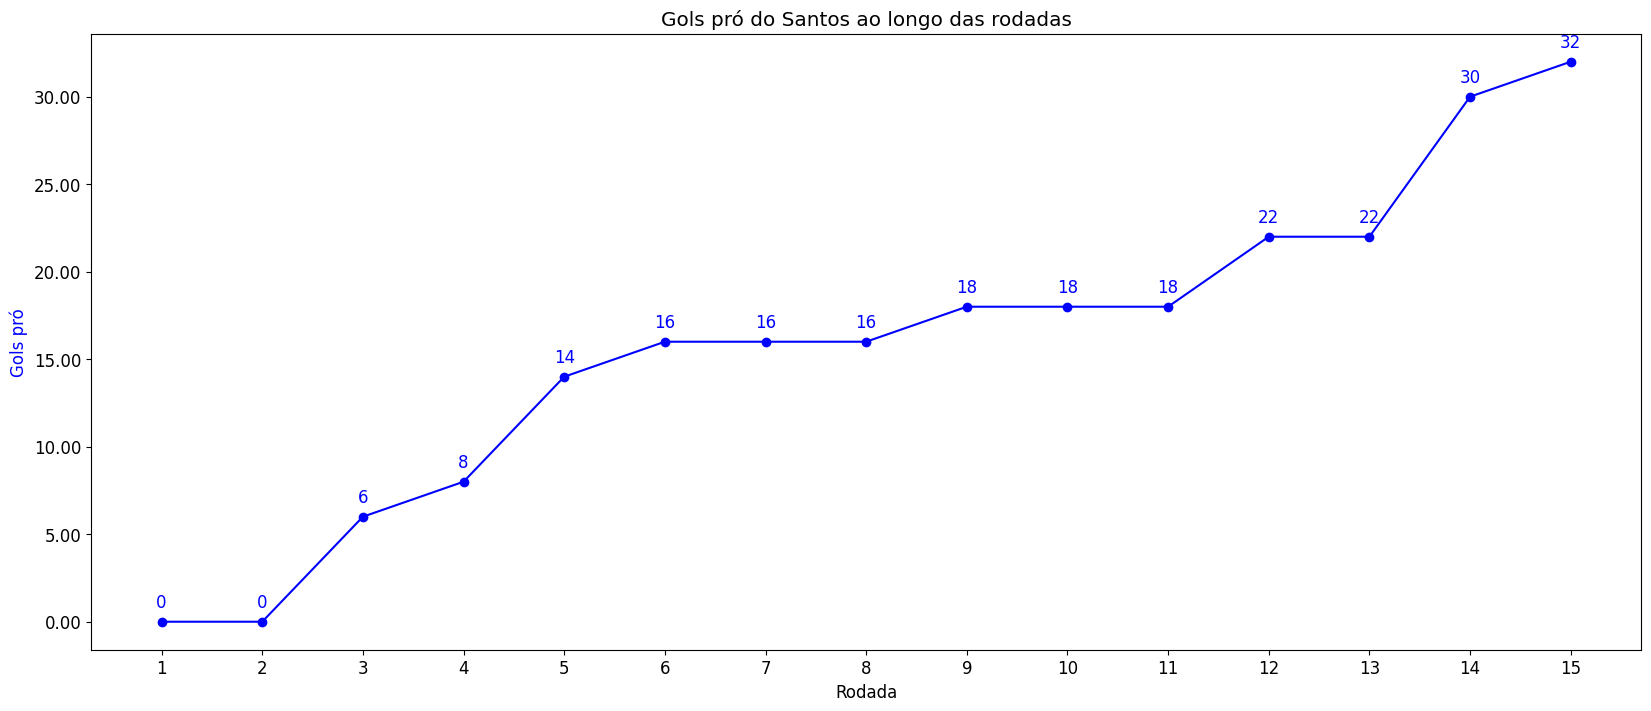

In [66]:
time = "Santos"
# time = "São Paulo"
# time = "Palmeiras"
# time = "Grêmio"
# time = "Internacional"
# indicador = "% aproveitamento"
# indicador = "Posição"
# indicador = "Saldo de gols"
indicador = "Gols pró"
if indicador == "% aproveitamento":
  indicador_formato_eixo_y = "{x:.1%}"
  indicador_formato_y = "{:.1%}"
else:
  indicador_formato_eixo_y = "{x:.0f}"
  indicador_formato_y = "{:.0f}"
indicador_formato_eixo_x = "{x:.0f}"

grafico_indicador_time_rodadas = tabela_brasileirao_serieA_rodadas.loc[
    (tabela_brasileirao_serieA_rodadas["Time"] == time),
    [indicador, "Rodada"]]

grafico_com_rotulos(
    grafico_indicador_time_rodadas, "Rodada", indicador,
    tipo_grafico = "line", titulo_grafico = indicador + " do " + time + " ao longo das rodadas", tamanho_grafico = (20, 8),
    fig = None, ax = None,
    tamanho_fonte = 12, grossura_barra = 1,
    cor_x = "b", rotacao_x = 0,
    formato_eixo_x = indicador_formato_eixo_x, formatador_eixo_x = matplotlib.ticker.StrMethodFormatter, locator_eixo_x = matplotlib.ticker.MultipleLocator(),
    formato_y = indicador_formato_y, rotacao_y = 0, #limite_min_y = None, limite_max_y = None,
    xytext_label_y = (0,10),
  )

## Evolução por datas

In [67]:
lista_datas_validas = base_jogos_tratada_duplicada \
  [(base_jogos_tratada_duplicada["Torneio"] == "Brasileirão Série A") \
  * (base_jogos_tratada_duplicada["Resultado"] != "Jogo ainda não ocorreu")
  ]["Data e Hora"].dt.normalize().sort_values().unique()#.sort()
# display(lista_datas_validas)
# print(lista_datas_validas[0])

tabela_brasileirao_serieA_datas = pd.DataFrame()
temp = base_jogos_tratada_duplicada \
  [(base_jogos_tratada_duplicada["Torneio"] == "Brasileirão Série A") \
  * (base_jogos_tratada_duplicada["Resultado"] != "Jogo ainda não ocorreu")
  ].copy()

for data in lista_datas_validas:
  # print(data)

  # base_jogos_tratada_duplicada[base_jogos_tratada_duplicada["Data e Hora"].dt.normalize() <= lista_datas_validas[0]]
  tabela_brasileirao_serieA_datas_temp = cria_tabela_brasileirao(
      temp.loc[
        temp["Data e Hora"].dt.normalize() <= data
      ] \
        .drop(["Time (nome)", "Resultado do Time"], axis = 1) \
        .drop_duplicates(ignore_index = True)
    ).reset_index()
  tabela_brasileirao_serieA_datas_temp["Data"] = data


  tabela_brasileirao_serieA_datas = pd.concat([
    tabela_brasileirao_serieA_datas,
    tabela_brasileirao_serieA_datas_temp
  ])

tabela_brasileirao_serieA_datas = tabela_brasileirao_serieA_datas.reset_index().drop("index", axis = 1)

display(tabela_brasileirao_serieA_datas)

tabela_brasileirao_serieA_datas \
  .to_excel(caminho_da_pasta + 'Relatórios/Datas Acumuladas Brasileirão Série A .xlsx')

,Posição,Time,Pontos (total),Qtd jogos (total),Qtd vitórias (total),Qtd empates (total),Qtd derrotas (total),Gols pró,Gols contra,Saldo de gols,% aproveitamento,Data
0,1,Fluminense,6.0,2.0,2.0,0.0,0.0,6.0,0.0,6.0,1.000000,2023-04-15
1,2,Athletico PR,6.0,2.0,2.0,0.0,0.0,4.0,0.0,4.0,1.000000,2023-04-15
2,3,Botafogo,6.0,2.0,2.0,0.0,0.0,4.0,2.0,2.0,1.000000,2023-04-15
3,4,Palmeiras,6.0,2.0,2.0,0.0,0.0,4.0,2.0,2.0,1.000000,2023-04-15
4,5,RB Bragantino,6.0,2.0,2.0,0.0,0.0,4.0,2.0,2.0,1.000000,2023-04-15
...,...,...,...,...,...,...,...,...,...,...,...,...
749,16,Bahia,26.0,30.0,6.0,8.0,16.0,30.0,46.0,-16.0,0.288889,2023-07-17
750,17,Goiás,24.0,30.0,6.0,6.0,18.0,28.0,52.0,-24.0,0.266667,2023-07-17
751,18,Coritiba,22.0,30.0,4.0,10.0,16.0,28.0,56.0,-28.0,0.244444,2023-07-17
752,19,Vasco,18.0,28.0,4.0,6.0,18.0,22.0,46.0,-24.0,0.214286,2023-07-17


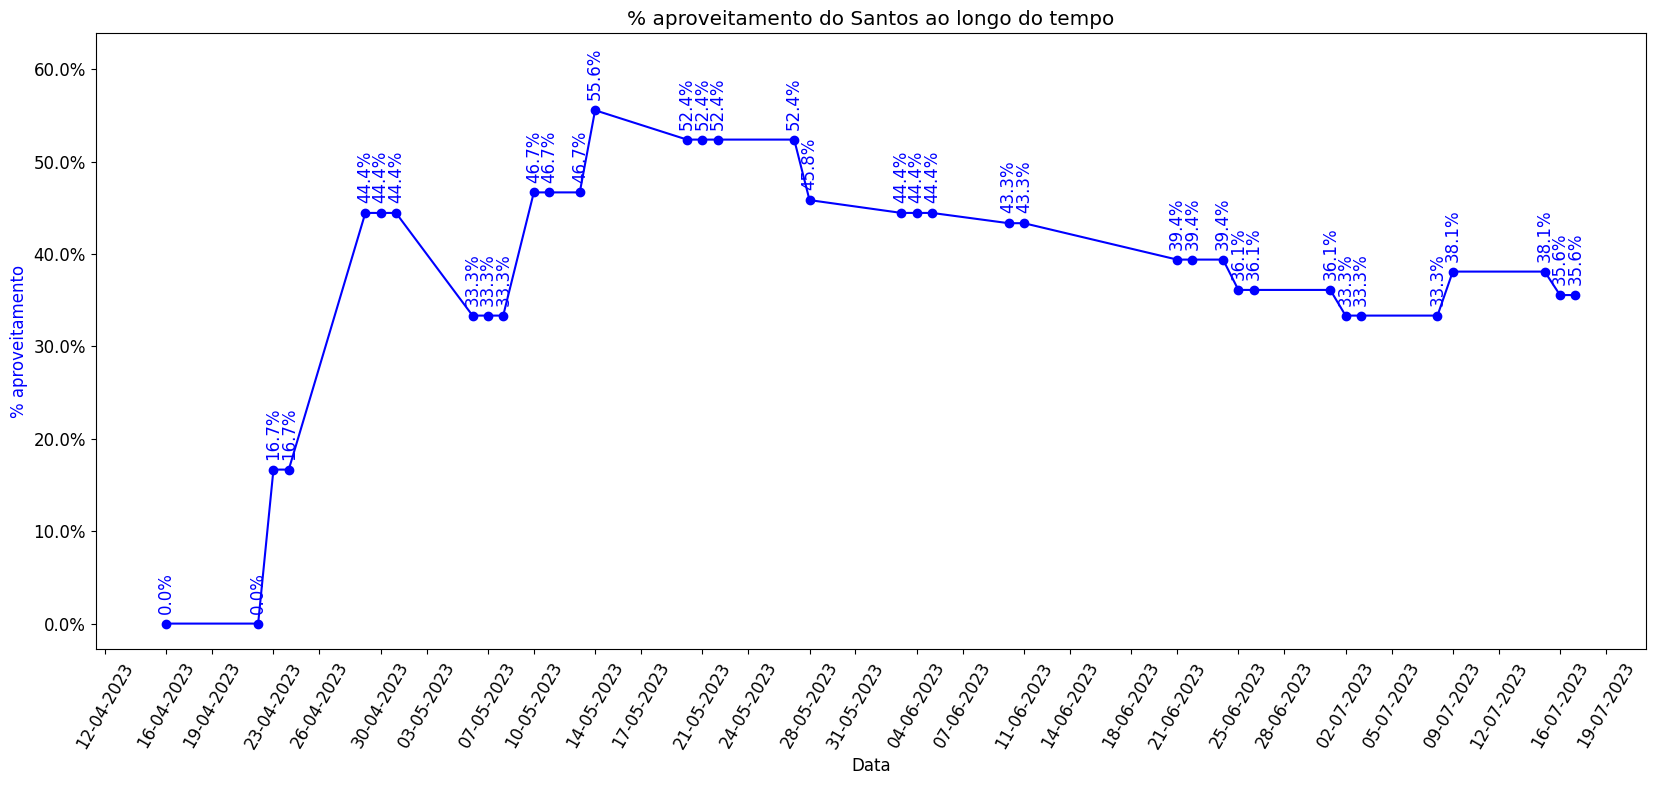

In [68]:
time = "Santos"
# time = "São Paulo"
# time = "Palmeiras"
# time = "Grêmio"
# time = "Internacional"
indicador = "% aproveitamento"
# indicador = "Posição"
# indicador = "Saldo de gols"
# indicador = "Gols pró"
if indicador == "% aproveitamento":
  indicador_formato_eixo_y = "{x:.1%}"
  indicador_formato_y = "{:.1%}"
else:
  indicador_formato_eixo_y = "{x:.0f}"
  indicador_formato_y = "{:.0f}"

indicador_formato_eixo_x = "%d-%m-%Y"
# locator = matplotlib.dates.DayLocator(interval=3) # A cada 3 dias
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU
locator = matplotlib.dates.WeekdayLocator(byweekday=(SU, WE)) # A cada dia da semana


# grafico_indicador_time_datas["Data"] = grafico_indicador_time_datas["Data"].
grafico_indicador_time_datas = tabela_brasileirao_serieA_datas.loc[
    (tabela_brasileirao_serieA_datas["Time"] == time),
    [indicador, "Data"]]
grafico_indicador_time_datas["Data"] = grafico_indicador_time_datas["Data"].dt.date


grafico_com_rotulos(
    grafico_indicador_time_datas, "Data", indicador,
    tipo_grafico = "line", titulo_grafico = indicador + " do " + time + " ao longo do tempo", tamanho_grafico = (20, 8),
    fig = None, ax = None,
    tamanho_fonte = 12, grossura_barra = 1,
    cor_x = "b", rotacao_x = 60,
    formato_eixo_x = indicador_formato_eixo_x, formatador_eixo_x = matplotlib.dates.DateFormatter, locator_eixo_x = locator,
    formato_eixo_y = indicador_formato_eixo_y,
    formato_y = indicador_formato_y, rotacao_y = 90,
    limite_min_y = None, limite_max_y = 1.15,
    xytext_label_y = (0,10),
  )

# Tabela de pontos Brasileirão Série B

In [69]:
tabela_brasileirao_serieB = cria_tabela_brasileirao(
    base_jogos_tratada_duplicada[
      (base_jogos_tratada_duplicada["Torneio"] == "Brasileirão Série B") \
        * (base_jogos_tratada_duplicada["Resultado"] != "Jogo ainda não ocorreu")
      ] \
      .drop(["Time (nome)", "Resultado do Time"], axis = 1) \
      .drop_duplicates(ignore_index = True)
)

tabela_brasileirao_serieB

,Time,Pontos (total),Qtd jogos (total),Qtd vitórias (total),Qtd empates (total),Qtd derrotas (total),Gols pró,Gols contra,Saldo de gols,% aproveitamento
Posição,,,,,,,,,,
1,Vila Nova,68.0,34.0,20.0,8.0,6.0,42.0,12.0,30.0,0.666667
2,Criciúma,68.0,36.0,20.0,8.0,8.0,42.0,22.0,20.0,0.629630
3,Novorizontino,66.0,36.0,20.0,6.0,10.0,46.0,22.0,24.0,0.611111
4,Sport,64.0,34.0,18.0,10.0,6.0,52.0,28.0,24.0,0.627451
5,Vitória,62.0,34.0,20.0,2.0,12.0,52.0,28.0,24.0,0.607843
6,Mirassol,60.0,36.0,18.0,6.0,12.0,38.0,32.0,6.0,0.555556
7,Juventude,54.0,36.0,16.0,6.0,14.0,40.0,36.0,4.0,0.500000
8,Botafogo SP,54.0,34.0,16.0,6.0,12.0,26.0,40.0,-14.0,0.529412
9,Guarani,52.0,34.0,14.0,10.0,10.0,44.0,30.0,14.0,0.509804


In [70]:
tabela_brasileirao_serieB \
  .to_excel(caminho_da_pasta + 'Relatórios/Tabela Brasileirão Série B.xlsx')

# TO-DO

- [] Incluir dados de temperatura e umidade para o local dos jogos passados (e a previsão do futuro como entrada da predição)